<a href="https://colab.research.google.com/github/yagnik99/Funds-Prediction-for-a-Startup/blob/main/Yagnik_Pandya_Capstone_Project_4_Startup_Funding_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - Avg session time / user x Open rate = Total session time
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



###**Importing Required Libraries**

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/Capstone Project 4/data/'

In [ ]:
O_data = pd.read_csv(folder + 'data_driven_investment_1.csv')

In [ ]:
O_data.head(3)

UUID  ...  funding_ind
0  c1ad38e2d357610c129657d870ede902e8abfcb9  ...            0
1  d841e670d9191f896a0cbc75961920887b375756  ...            0
2  0a59d138b3eaccd22b665eae70c756fef83ddb63  ...            0

[3 rows x 20 columns]

In [ ]:
# Shape of Original Dataset
O_data.shape

(1502175, 20)

In [ ]:
O_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502175 entries, 0 to 1502174
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   UUID                  1500693 non-null  object 
 1   month                 1502175 non-null  int64  
 2   Application Category  1502175 non-null  object 
 3   Avg_Session_Time      877732 non-null   float64
 4   Business Models       2414 non-null     object 
 5   City                  2407 non-null     object 
 6   Company Stage         2414 non-null     object 
 7   Feed Name             2414 non-null     object 
 8   Founded Year          2414 non-null     float64
 9   Latest Funded Date    2414 non-null     object 
 10  MAU                   118087 non-null   float64
 11  Open_Rate             877715 non-null   float64
 12  Overview              2414 non-null     object 
 13  Practice Areas        2414 non-null     object 
 14  Reach                 1050875 non-

##**Initial Approach**

###We have dataset for different startups in different categories. We need to predict weather the startup would recive fund in next three months or not. For that we would go three months back to data and from that we would try to predict for next three months. So, Finally we would have a model that can predict for three months with the data of month we have.

###For eg : If we have data of current month we will be able to predict for upcoming three months. 

In [ ]:
#Count of Funded Startups
O_data['funding_ind'].value_counts()

0    1499761
1       2414
Name: funding_ind, dtype: int64

###**Checking and Droping Duplicate values**

In [ ]:
# Checking for duplicates
len(O_data[O_data.duplicated()])

89412

In [ ]:
#Droping Duplicates
O_data.drop_duplicates(inplace=True)

In [ ]:
O_data.isna().sum()

UUID                        969
month                         0
Application Category          0
Avg_Session_Time         535031
Business Models         1410459
City                    1410466
Company Stage           1410459
Feed Name               1410459
Founded Year            1410459
Latest Funded Date      1410459
MAU                     1294676
Open_Rate                535048
Overview                1410459
Practice Areas          1410459
Reach                    451300
Region                        0
Total Funding (USD)     1410605
Total_Session_Time       535098
Uninstall_Rate          1060560
funding_ind                   0
dtype: int64

###Checking where there is no UUID and droping those if no funds recieved as it will be of no use. 

In [ ]:
# Where UUID is null
len(O_data[O_data['UUID'].isna()])

969

In [ ]:
# Subset of data where UUID is not null
O_data = O_data[O_data['UUID'].notna()]

In [ ]:
# Duration of Data
print(O_data['month'].min(),'- start')
print(O_data['month'].max(), '- end')

20180701 - start
20200601 - end


In [ ]:
# Copy of Data for future use
data = O_data.copy()

###Removing Features that are only for funded startups.

In [ ]:
# Features that are only for funded Start up
Funded_features = ['Business Models', 'City', 'Company Stage', 'Feed Name', 'Founded Year', 'Latest Funded Date', 'MAU', 'Overview', 'Practice Areas', 'Total Funding (USD)', 'Uninstall_Rate']

In [ ]:
data.drop(Funded_features, axis = 1, inplace=True)

In [ ]:
data.shape

(1411794, 9)

### Many null values in above so will try to find out if there is any pattern of those missing values.

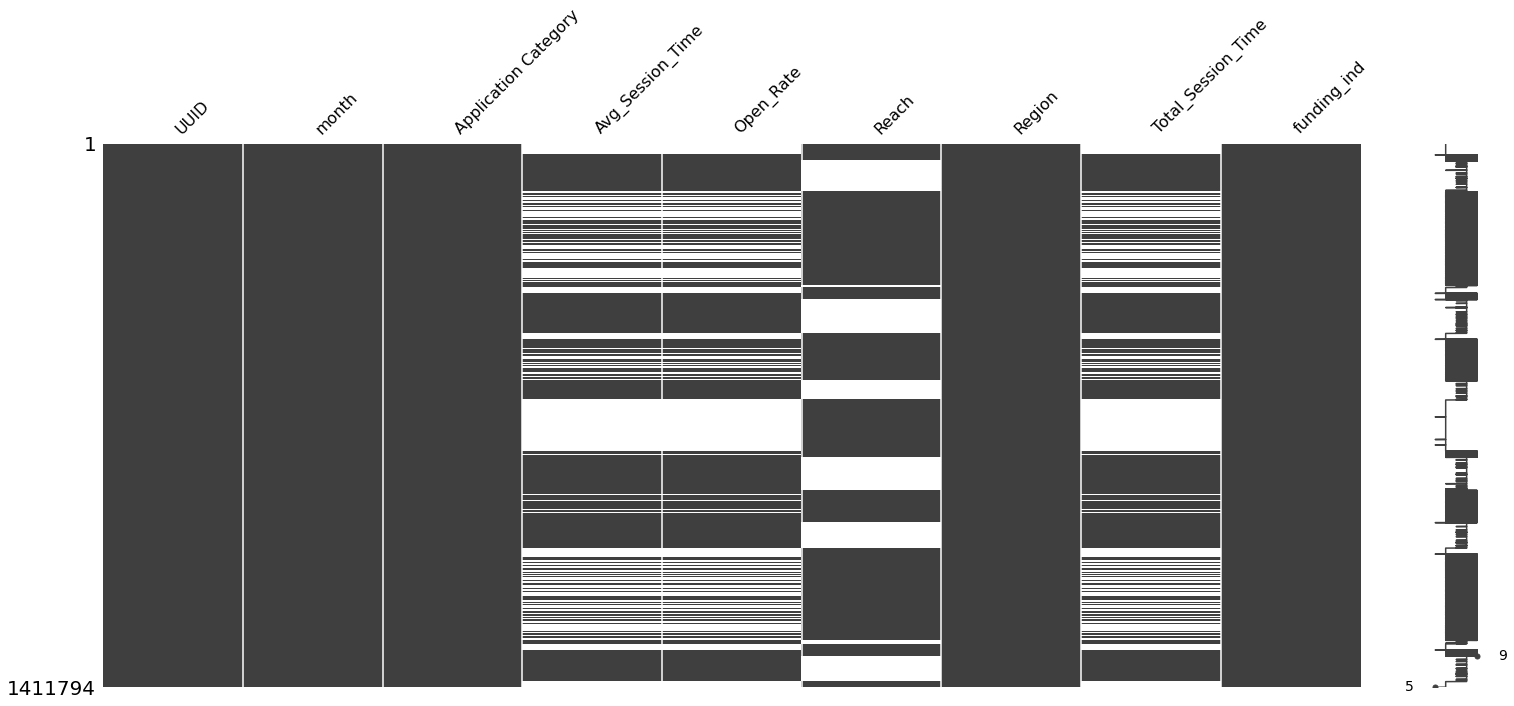

In [ ]:
# Identifying patter in missing values
import missingno as msno
msno.matrix(data)

###From above it is clear that there is a trend in 'Avg_Session_Time', 'Open_rate' and 'Total_session_time'

###Creating New columns of Month and Year to get the trend.

In [ ]:
data['Year'] = data['month'].apply(lambda x : (int(str(x)[:4])))
data['Month'] = data['month'].apply(lambda x : (int(str(x)[4:6])))
#data['Day'] = data['month'].apply(lambda x : (int(str(x)[6:])))   - All are of 1st day of month

In [ ]:
data.drop(['Region'], axis=1, inplace = True)

###Seperating Datasets as funded and non-funded.

In [ ]:
# Subset of funded statups for EDA
Funded = data[data['funding_ind']==1]

In [ ]:
# Subset of Non Funded startups for EDA
Non_funded = data[data['funding_ind']==0]

In [ ]:
# Impute missing values
def fill_missing(dataframe):
  new_data = pd.DataFrame(columns=dataframe.columns)              # First will impute missing values with forward and back fill.
  Category_list = dataframe['Application Category'].value_counts().index.to_list()
  years = dataframe['Year'].value_counts().index.to_list()
  for i in Category_list:
    temp = dataframe[dataframe['Application Category']==i]
    for y in years:
      temp1 = temp[temp['Year']==y]
      temp1.fillna(method='ffill', limit = 2, inplace = True)
      temp1.fillna(method='backfill', limit = 1, inplace = True)
      new_data = pd.concat([new_data, temp1])
  
  new_data_1 = pd.DataFrame(columns=dataframe.columns)            # Remaining imputed with mean of category and year.
  for i in Category_list:
    temp = new_data[new_data['Application Category']==i]
    for y in years:
      temp1 = temp[temp['Year']==y]
      temp1.fillna(temp1.mean(), inplace = True)
      new_data_1 = pd.concat([new_data_1, temp1])

  Final_data = pd.DataFrame(columns=dataframe.columns)            # Still remaining imputed with mean of whole category.
  for i in Category_list:
    temp = new_data_1[new_data_1['Application Category']==i]
    temp.fillna(temp.mean(), inplace = True)
    Final_data = pd.concat([Final_data, temp])

  return Final_data

In [ ]:
# Removing missing values in funded
Funded = fill_missing(Funded)

In [ ]:
# Removing missing values in Non funded
Non_funded = fill_missing(Non_funded)

In [ ]:
# Filling rest missing values with overall mean
Funded.fillna(Funded.mean(), inplace = True)

In [ ]:
Final_data = pd.concat([Funded, Non_funded])

In [ ]:
Final_data.shape

(1411794, 10)

In [ ]:
# Saving data sets for future easy use purpose
Final_data.to_csv(folder + 'Final_dataset.csv', index= False)
Funded.to_csv(folder + 'Funded_dataset.csv', index= False)
Non_funded.to_csv(folder + 'Non_funded_dataset.csv', index= False)

In [ ]:
# Importing saved DF
#Funded_df = pd.read_csv(folder + 'Funded_dataset.csv')
#Non_funded_df = pd.read_csv(folder + 'Non_funded_dataset.csv')

#**OFFSET**

In [ ]:
Final_df = pd.read_csv(folder + 'Final_dataset.csv')

In [ ]:
Final_df.shape

(1411794, 10)

#**ABC**

In [ ]:
Final_df.drop_duplicates(['UUID', 'month', 'Application Category', 'funding_ind'], inplace = True)

In [ ]:
Final_df.shape

(945184, 10)

In [ ]:
Funded_df = Final_df[Final_df['funding_ind']==1]
Non_funded_df = Final_df[Final_df['funding_ind']==0]

##**EDA**

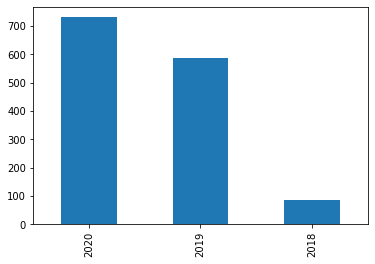

In [ ]:
#Trend of recieving funds
Funded_df['Year'].value_counts().plot(kind='bar')

In [ ]:
# Startups that has never recieved funds
never_funded = list(set(Non_funded_df['Application Category'].value_counts().index.to_list()) - set(Funded_df['Application Category'].value_counts().index.to_list()))
never_funded

['Music',
 'Art & Design',
 'Word',
 'Events',
 'Dating',
 'Casino',
 'Libraries & Demo']

Text(0.5, 1.0, 'Top 10 categories')

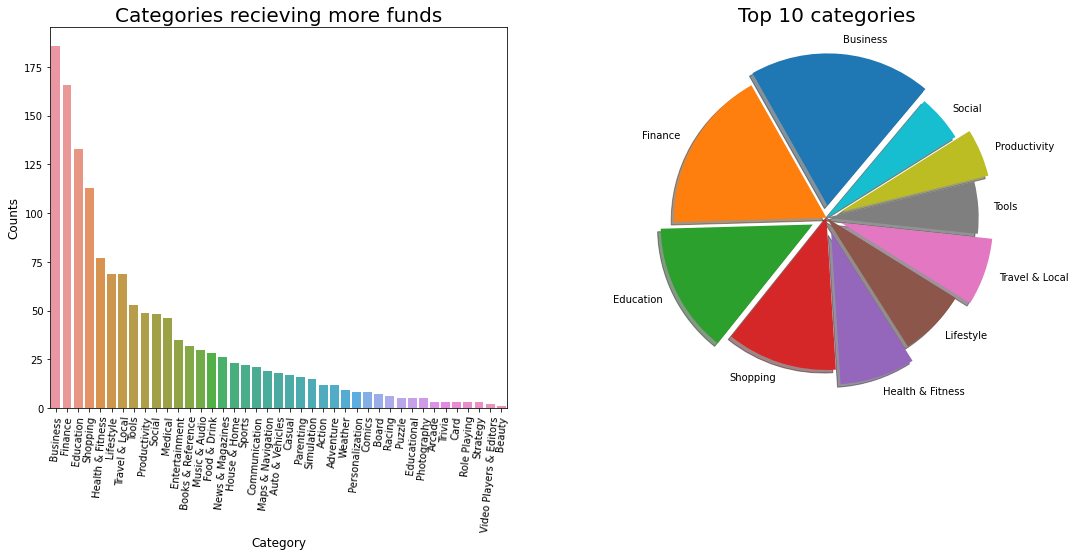

In [ ]:
# Category recieving more funds
plt.rcParams['figure.figsize'] = (18, 7)

a = pd.DataFrame(Funded_df['Application Category'].value_counts())
ax1 = plt.subplot(121)
sns.barplot(x=a.index, y= a['Application Category'] )
plt.xlabel('Category', fontsize = 12)
plt.xticks(rotation=85)
plt.ylabel('Counts', fontsize = 12)
ax1.set_title('Categories recieving more funds', fontsize = 20)

ax2 = plt.subplot(122)
explode =(0.08,0,0.1,0, 0.1,0,0.1,0, 0.1, 0)
plt.pie(a.sort_values(['Application Category'], ascending=False).head(10), labels=a.sort_values(['Application Category'], ascending=False).head(10).index, startangle=50, shadow = True, explode = explode)
ax2.set_title('Top 10 categories', fontsize = 20) 

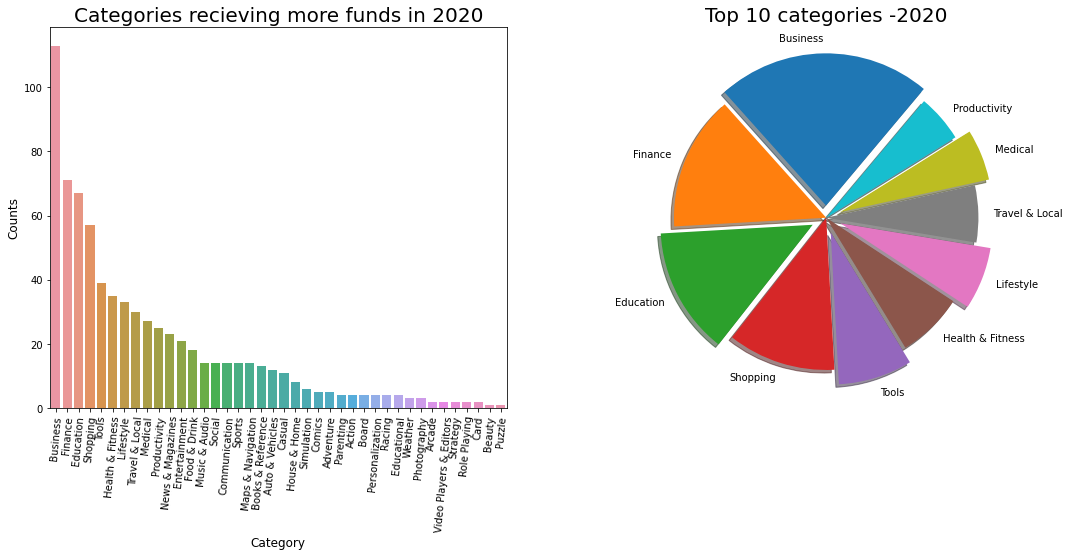

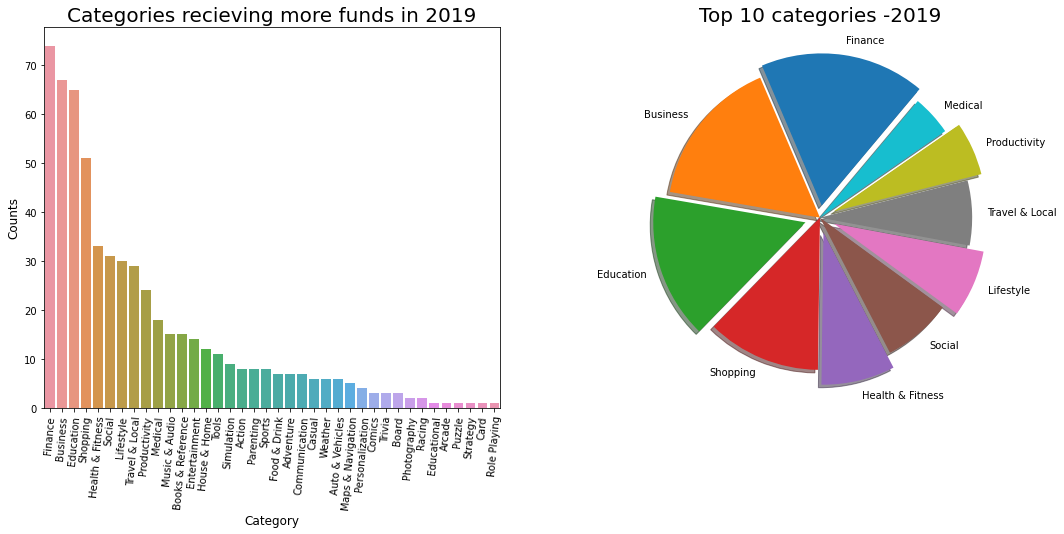

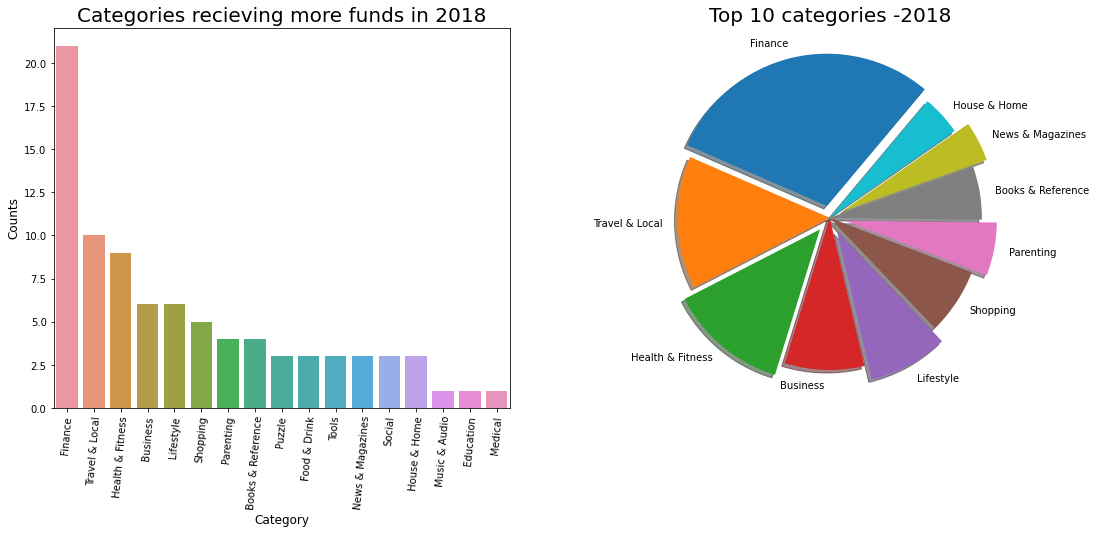

In [ ]:
# Trend of recieving funds over years for each category
years = Funded_df['Year'].value_counts().index.to_list()

plt.rcParams['figure.figsize'] = (18, 7)
for i in years:
  plt.figure()
  temp = Funded_df[Funded_df['Year']==i]
  a = pd.DataFrame(temp['Application Category'].value_counts())
  ax1 = plt.subplot(121)
  sns.barplot(x=a.index, y= a['Application Category'] )
  plt.xlabel('Category', fontsize = 12)
  plt.xticks(rotation=85)
  plt.ylabel('Counts', fontsize = 12)
  ax1.set_title('Categories recieving more funds in '+str(i), fontsize = 20)

  ax2 = plt.subplot(122)
  explode =(0.08,0,0.1,0, 0.1,0,0.1,0, 0.1, 0)
  plt.pie(a.sort_values(['Application Category'], ascending=False).head(10), labels=a.sort_values(['Application Category'], ascending=False).head(10).index, startangle=50, shadow = True, explode = explode)
  ax2.set_title('Top 10 categories -'+str(i), fontsize = 20) 

In [ ]:
# Numerical variables
numerical = ['Avg_Session_Time', 'Open_Rate', 'Reach', 'Total_Session_Time']

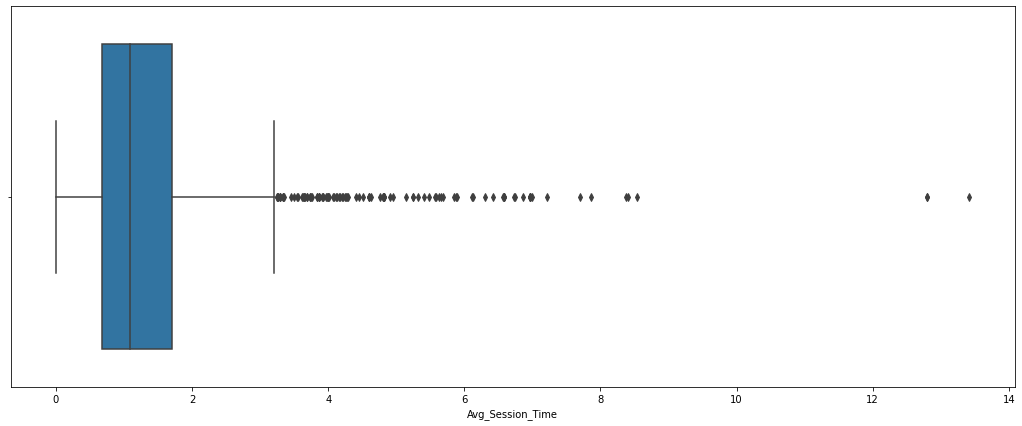

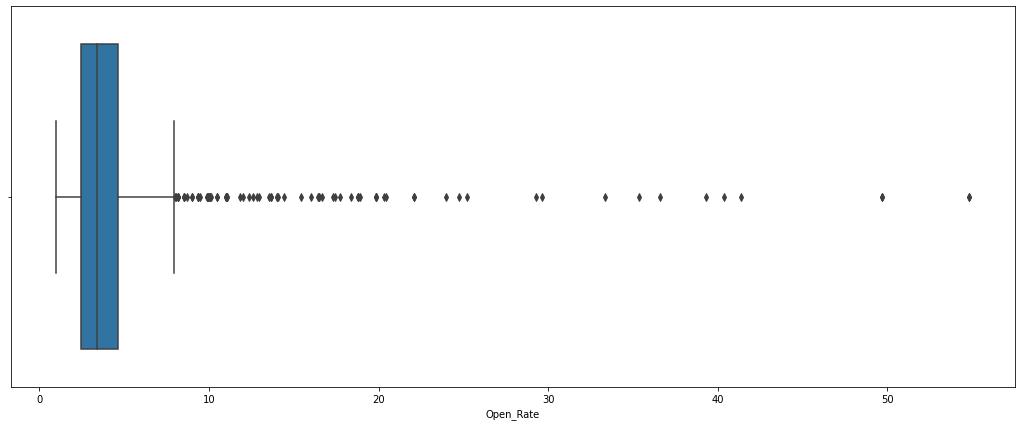

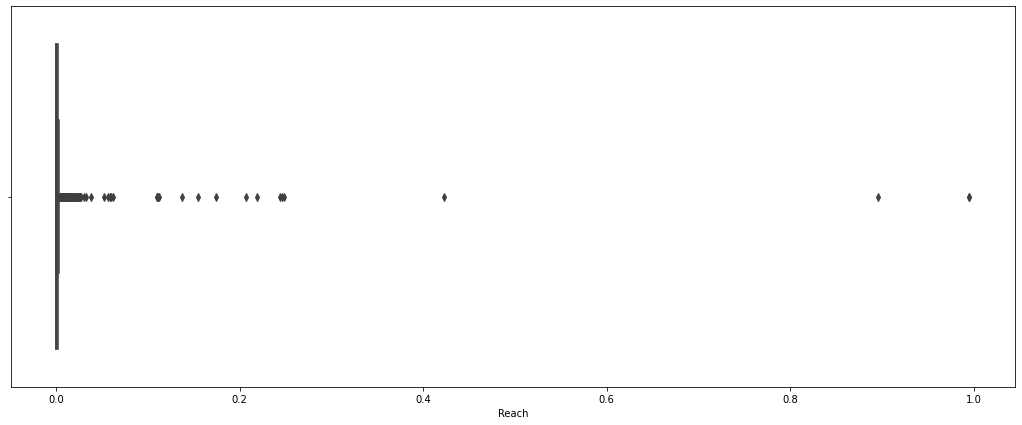

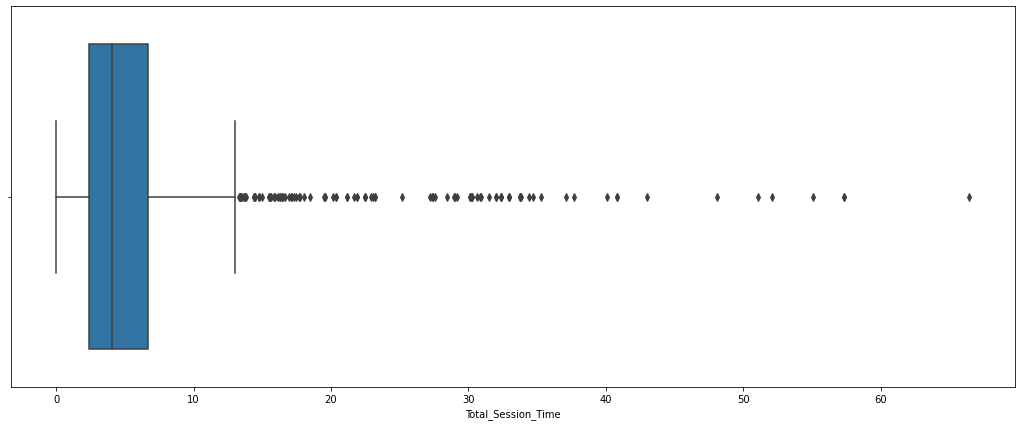

In [ ]:
for i in numerical:
  plt.figure()
  sns.boxplot(Funded_df[i])

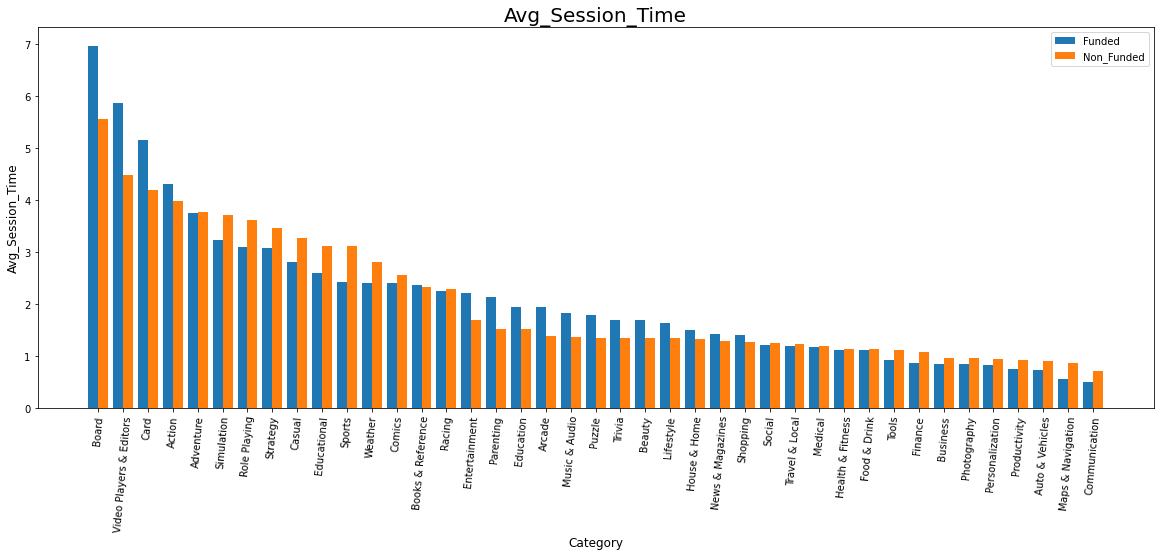

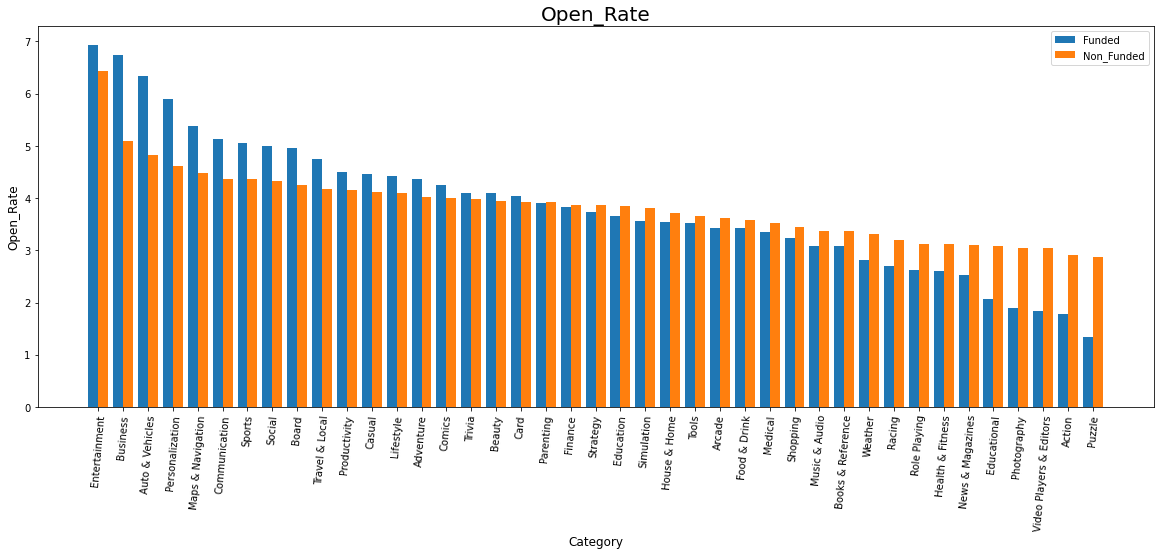

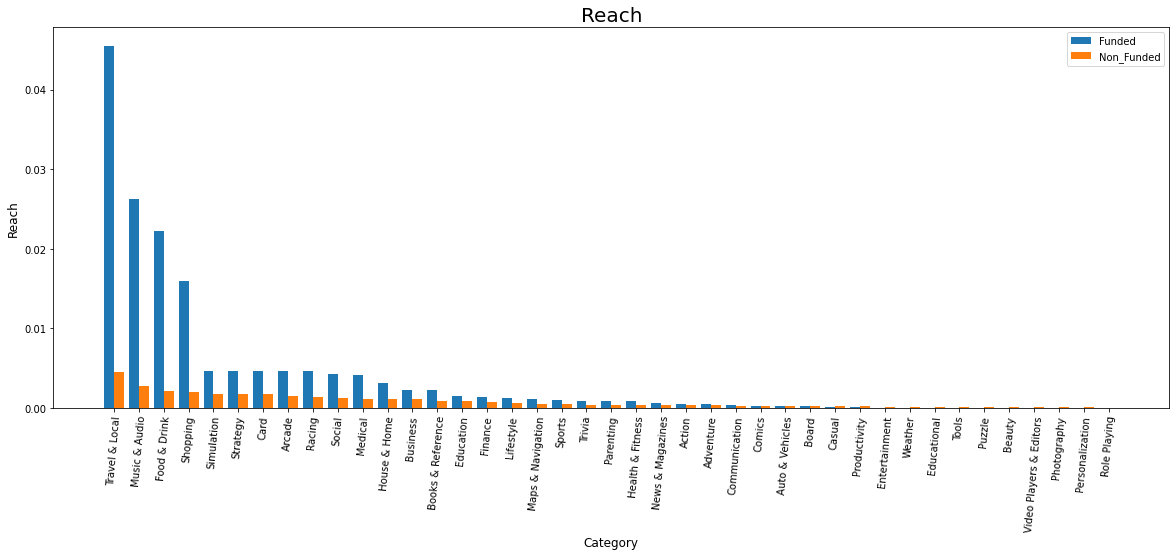

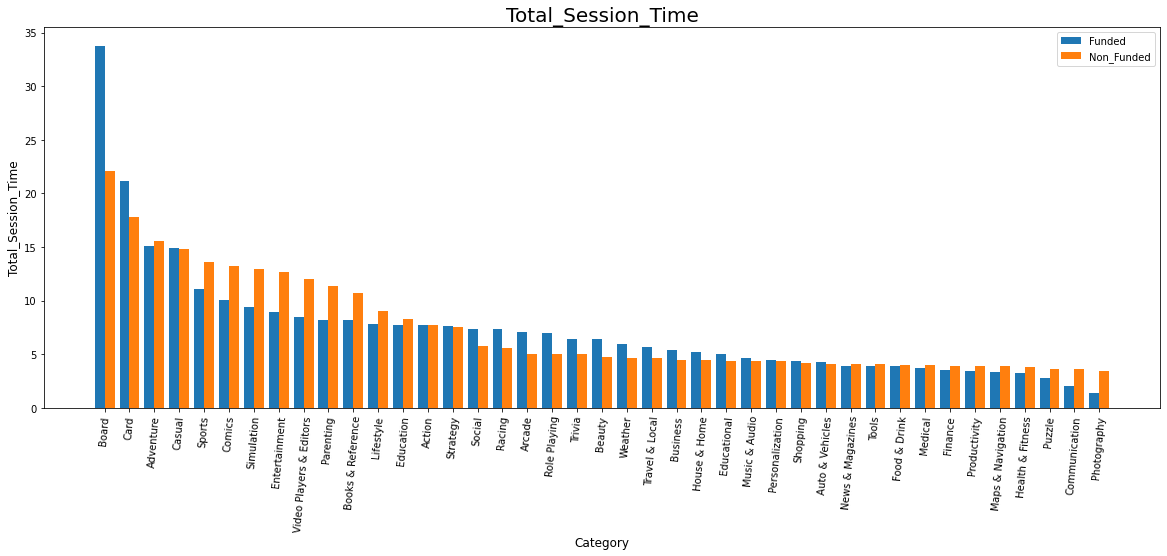

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)
for i in numerical:
  w=0.4
  temp = pd.DataFrame(Funded_df.groupby(['Application Category'])[i].mean())
  temp = temp.sort_values([i], ascending=False)
  temp2 = pd.DataFrame(Non_funded_df.groupby(['Application Category'])[i].mean())
  temp2 = temp2.sort_values([i], ascending=False)
  for j in never_funded:
    temp2.drop(j, inplace = True)

  bar1 = np.arange(len(temp.index))
  bar2 = [i+w for i in bar1]

  plt.bar(bar1, temp[i], w, label = 'Funded' )
  plt.bar(bar2, temp2[i], w, label = 'Non_Funded' )

  plt.xlabel('Category', fontsize = 12)
  plt.xticks(bar1+w/2, temp.index, rotation=85)
  plt.ylabel(i, fontsize = 12)
  plt.title(i, fontsize = 20)
  plt.legend()
  plt.show()

Not Funded in 2020 - ['Trivia', 'Art & Design', 'Music', 'Word', 'Events', 'Dating', 'Casino', 'Libraries & Demo']


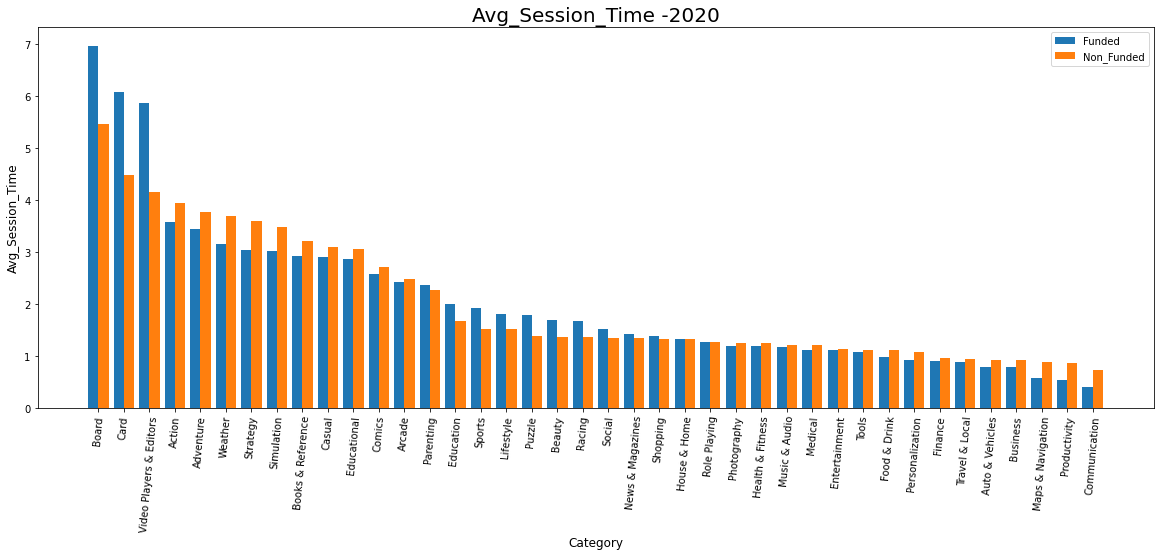

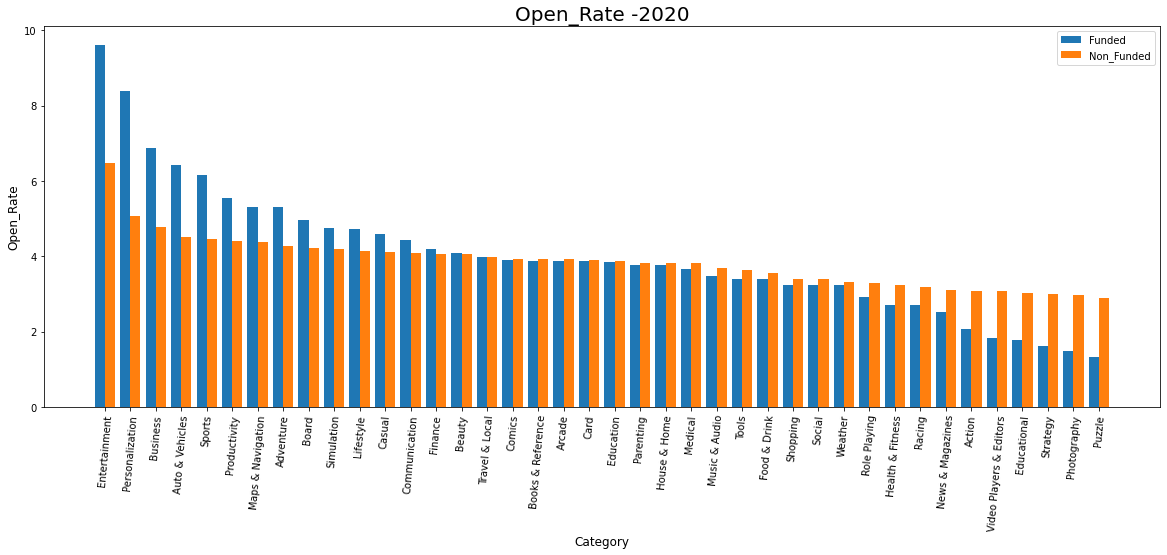

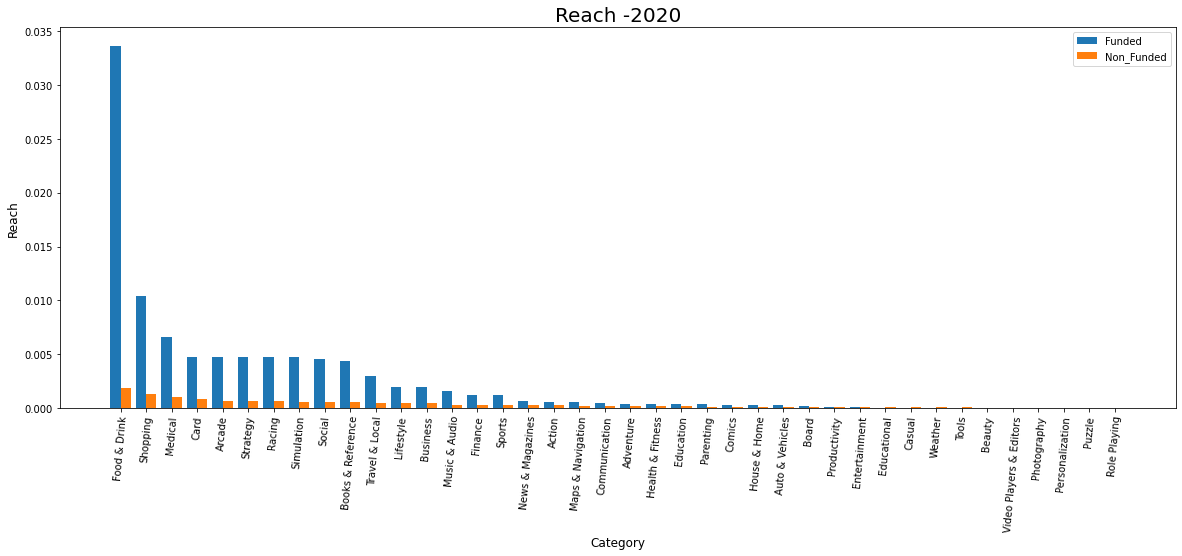

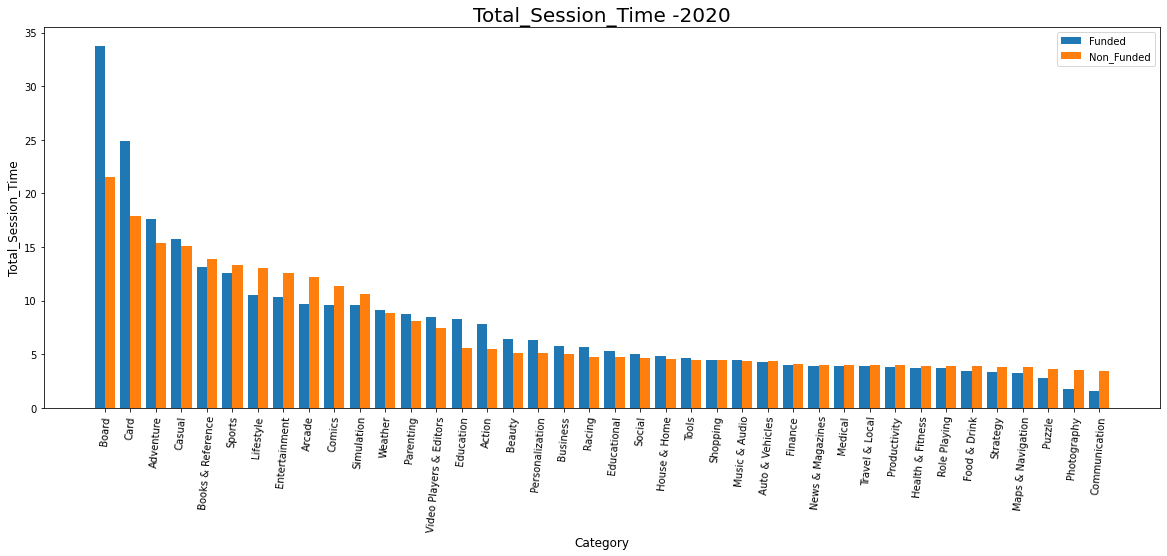

Not Funded in 2019 - ['Art & Design', 'Music', 'Word', 'Beauty', 'Events', 'News & Magazines', 'Video Players & Editors', 'Dating', 'Casino', 'Libraries & Demo']


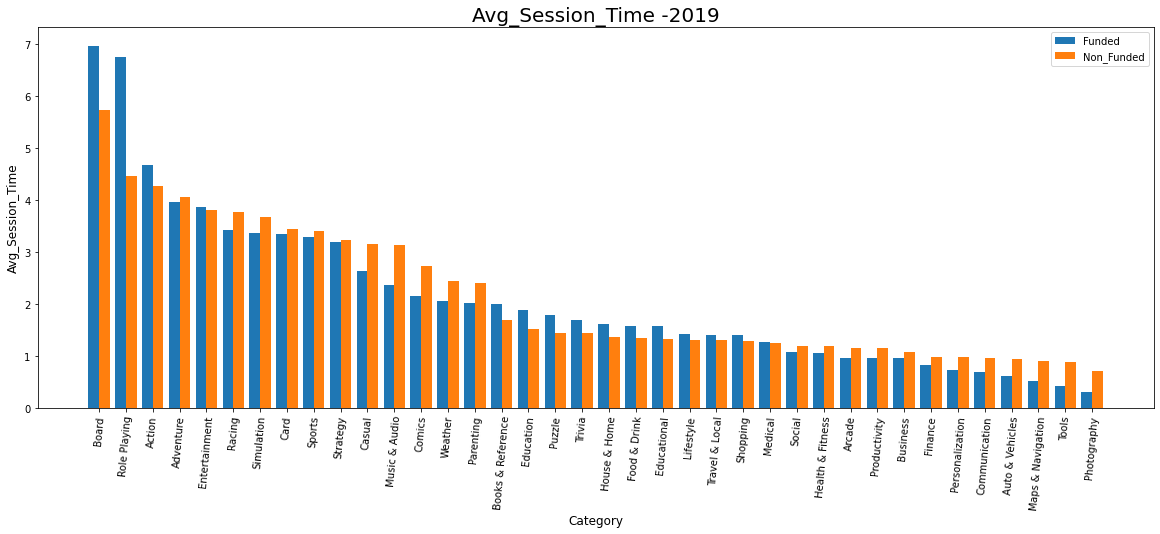

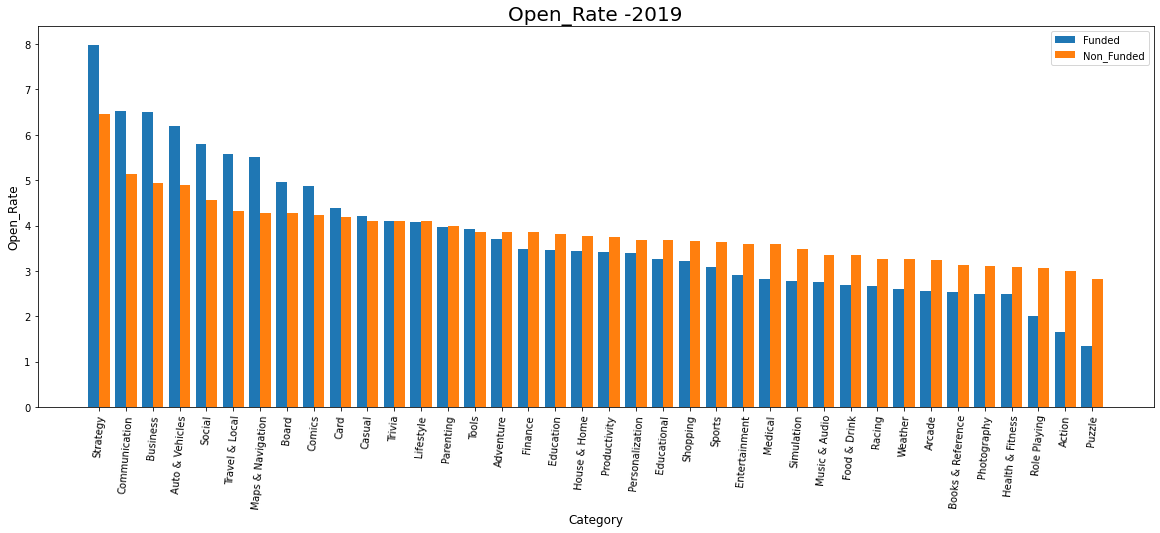

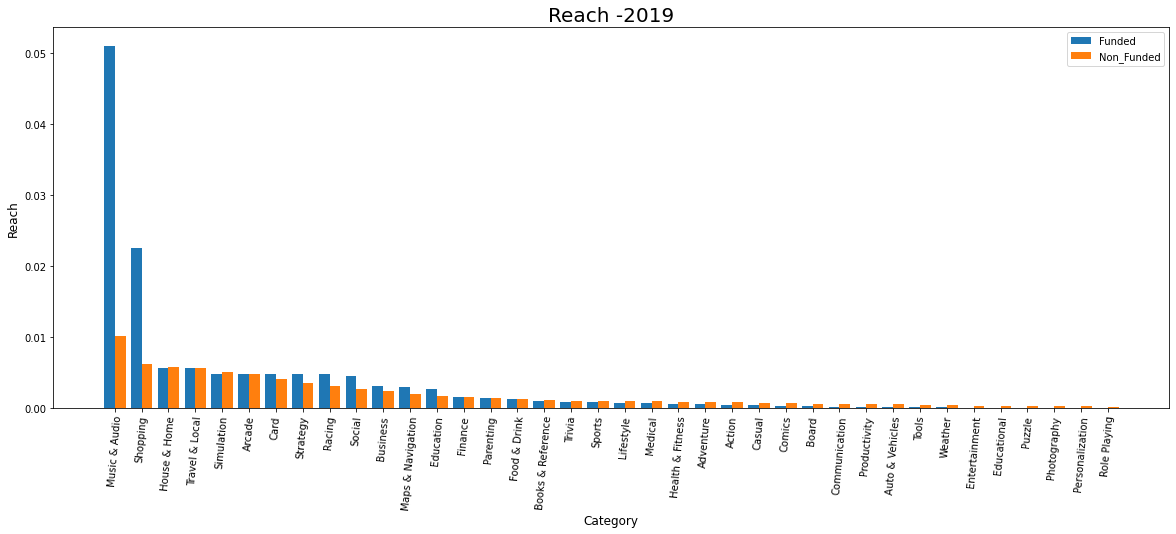

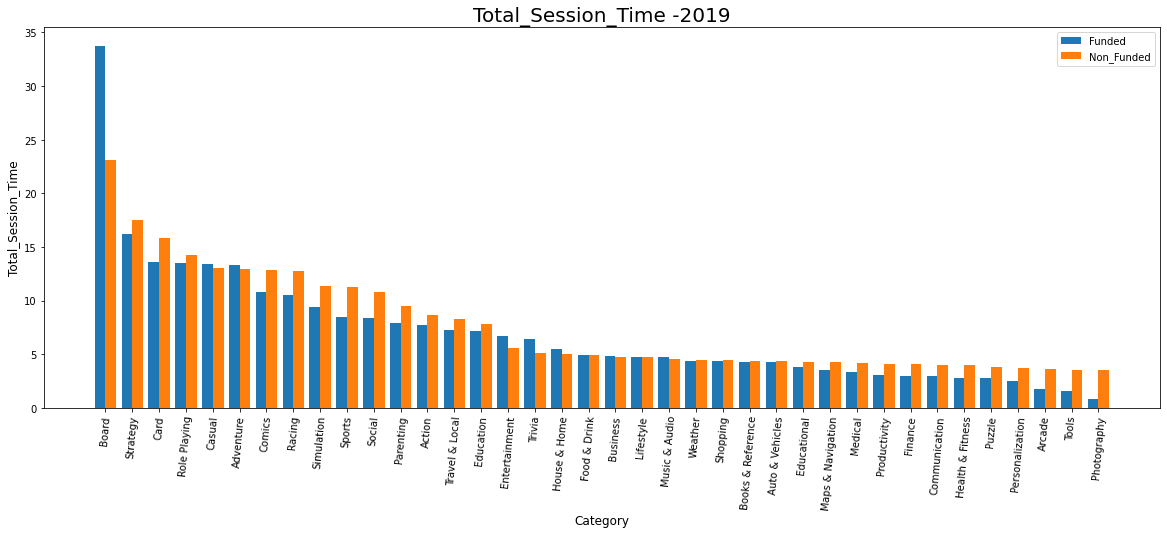

Not Funded in 2018 - ['Music', 'Sports', 'Communication', 'Strategy', 'Casino', 'Arcade', 'Productivity', 'Casual', 'Card', 'Word', 'Racing', 'Role Playing', 'Video Players & Editors', 'Entertainment', 'Simulation', 'Maps & Navigation', 'Personalization', 'Action', 'Trivia', 'Comics', 'Photography', 'Educational', 'Beauty', 'Auto & Vehicles', 'Art & Design', 'Board', 'Adventure', 'Events', 'Dating', 'Weather', 'Libraries & Demo']


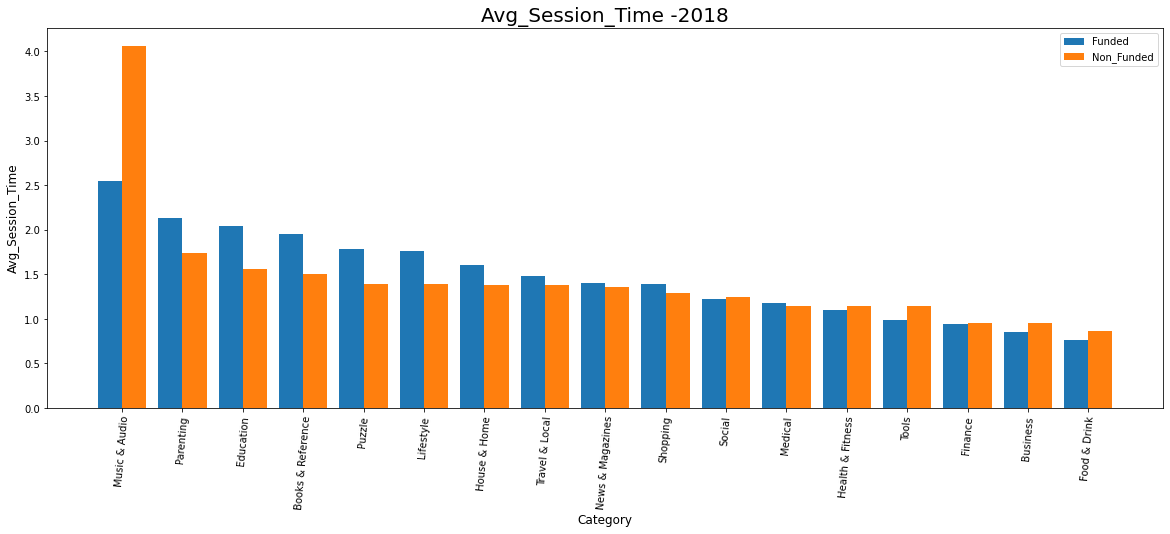

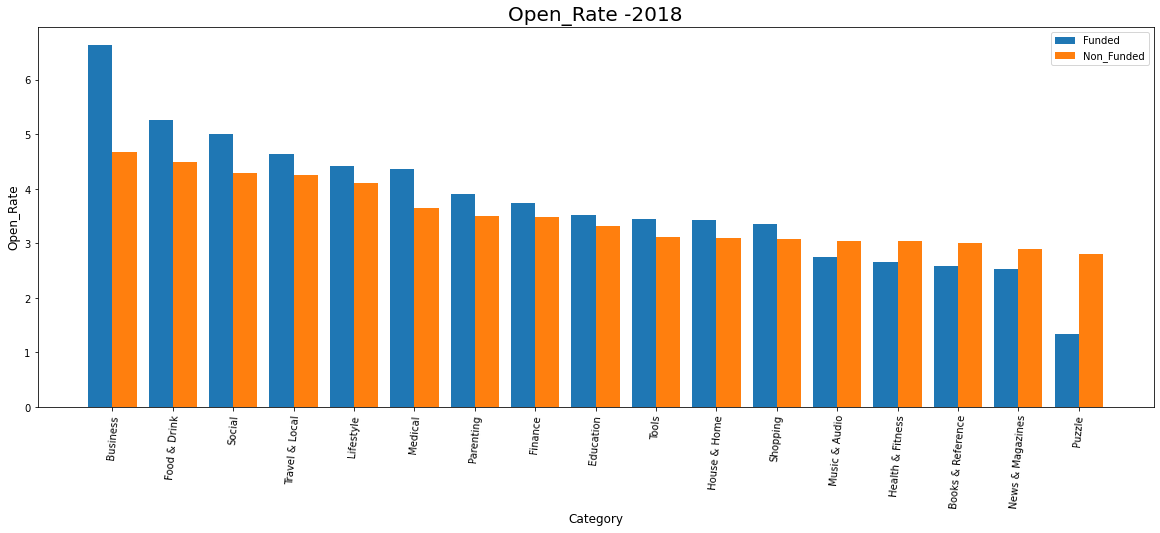

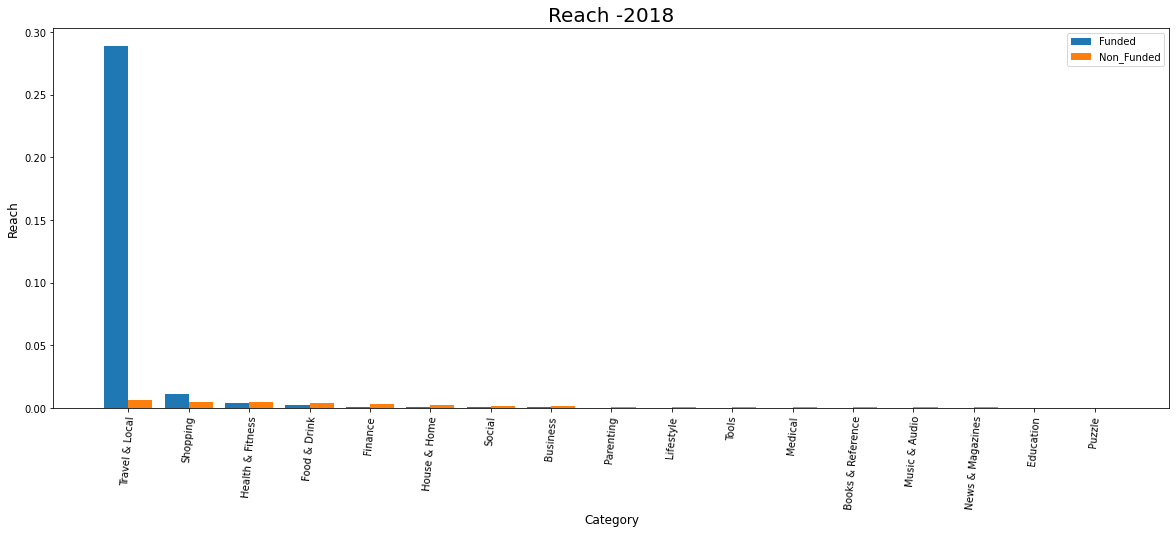

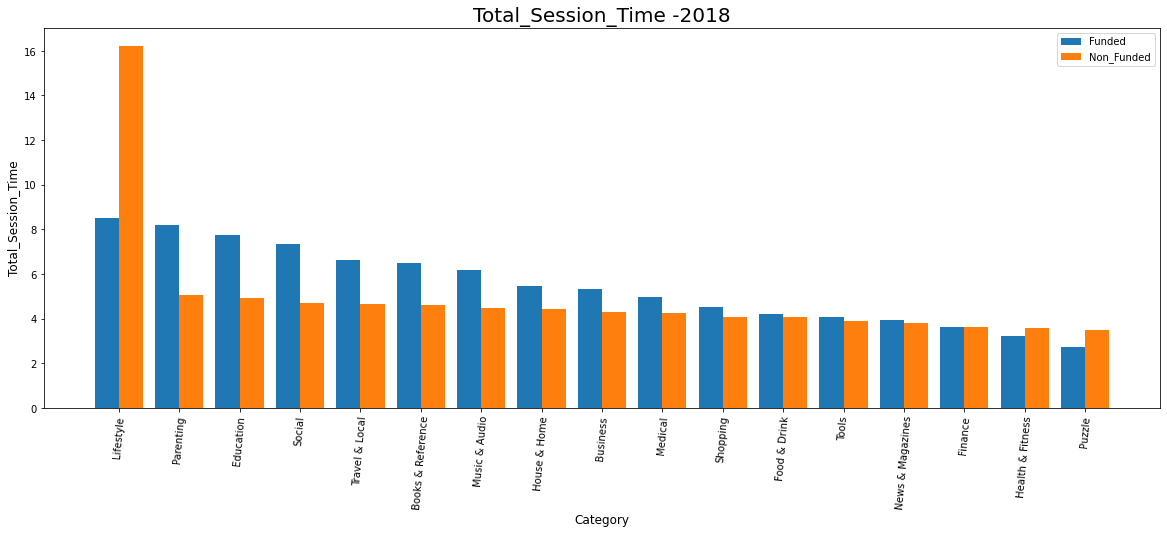

In [ ]:
# Trend for each category year wise
plt.rcParams['figure.figsize'] = (20, 7)

years = Funded_df['Year'].value_counts().index.to_list()
for j in years:
  a1 = Funded_df[Funded_df['Year']==j]
  a2 = Non_funded_df[Non_funded_df['Year']==j]
  not_funded = list(set(a2['Application Category'].value_counts().index.to_list()) - set(a1['Application Category'].value_counts().index.to_list()))
  print('Not Funded in '+str(j)+' -',not_funded)
  for i in numerical:
    w=0.4
    temp = pd.DataFrame(a1.groupby(['Application Category'])[i].mean())
    temp = temp.sort_values([i], ascending=False)
    temp2 = pd.DataFrame(a2.groupby(['Application Category'])[i].mean())
    temp2 = temp2.sort_values([i], ascending=False)
    for k in not_funded:
      temp2.drop(k, inplace = True)

    bar1 = np.arange(len(temp.index))
    bar2 = [i+w for i in bar1]

    plt.bar(bar1, temp[i], w, label = 'Funded' )
    plt.bar(bar2, temp2[i], w, label = 'Non_Funded' )

    plt.xlabel('Category', fontsize = 12)
    plt.xticks(bar1+w/2, temp.index, rotation=85)
    plt.ylabel(i, fontsize = 12)
    plt.title(i +' -'+ str(j), fontsize = 20)
    plt.legend()
    plt.show() 

In [ ]:
# Some UUID have multiple observations for same month, so will be taking mean of that in final dataset.
Funded_df[Funded_df['UUID']=='fd531f493d841c40301e4e0b234ebd2601b7c29d']

UUID     month  ...  Year  Month
2235  fd531f493d841c40301e4e0b234ebd2601b7c29d  20200601  ...  2020      6
2239  fd531f493d841c40301e4e0b234ebd2601b7c29d  20200501  ...  2020      5
2242  fd531f493d841c40301e4e0b234ebd2601b7c29d  20200401  ...  2020      4

[3 rows x 10 columns]

In [ ]:
# Dropping about 30,000 observations of Category that were never funded.
for i in never_funded:
  Final_df.drop(Final_df[Final_df['Application Category']==i].index, inplace =True)

In [ ]:
Final_df.shape

(924071, 10)

In [ ]:
# Taking only 1 category that has been funded most
a = pd.DataFrame(Funded_df['Application Category'].value_counts())
a = a.sort_values(['Application Category'], ascending=False).head(1)
cat_1 = a.index.to_list()

In [ ]:
cat_1_df = pd.DataFrame(columns = Final_df.columns)
for i in cat_1:
  temp = Final_df[Final_df['Application Category']==i]
  cat_1_df = pd.concat([cat_1_df, temp])

In [ ]:
cat_1_df.shape

(65051, 10)

###**Recent StartUps**

In [ ]:
# Startups within last 3 months
a = pd.DataFrame(cat_1_df['UUID'].value_counts())
recent_startups = a[a['UUID']<4].index.to_list()
len(recent_startups)

9423

In [ ]:
# Dropping recent startups
for i in recent_startups:
  cat_1_df.drop(cat_1_df[cat_1_df['UUID']==i].index, inplace =True)

In [ ]:
cat_1_df.shape

(47799, 10)

In [ ]:
cat_1_df.to_csv(folder + 'category.csv', index= False)

In [ ]:
def Previous_Data(column, dataframe):
  new_data = pd.DataFrame(columns = dataframe.columns)
  Unique_id = dataframe['UUID'].value_counts().index.to_list()

  for i in Unique_id:
    #print(i)
    temp1 = dataframe[dataframe['UUID']==i]
    temp2 = dataframe[dataframe['UUID']==i][['UUID', 'month', column]]
    temp2 = temp2.sort_values(by=['month'])
    temp2.set_index(['UUID', 'month'], inplace = True)
    temp2 = pd.DataFrame(temp2[column].shift(+1))
    temp2.fillna(temp2.mean(), inplace = True)
    temp2.rename(columns={column:column+'_Prev1'}, inplace=True)
    temp2.reset_index(inplace=True)
    temp2.drop(['UUID'], axis = 1, inplace=True)
    new_df = pd.merge(temp1, temp2, on = 'month', how='left')
    new_data = pd.concat([new_data, new_df])
  return new_data

In [ ]:
for i in numerical:
  print(i)
  cat_1_df = Previous_Data(i, cat_1_df)

Avg_Session_Time
Open_Rate
Reach
Total_Session_Time


In [ ]:
cat_1_df.shape

(47799, 14)

In [ ]:
cat_1_df.to_csv(folder + 'category_prev1.csv', index= False)

In [ ]:
numerical = ['Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1', 'Total_Session_Time_Prev1']

In [ ]:
for i in numerical:
  print(i)
  cat_1_df = Previous_Data(i, cat_1_df)

Avg_Session_Time_Prev1
Open_Rate_Prev1
Reach_Prev1
Total_Session_Time_Prev1


In [ ]:
cat_1_df.shape

(47799, 18)

In [ ]:
cat_1_df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev1_Prev1',
       'Open_Rate_Prev1_Prev1', 'Reach_Prev1_Prev1',
       'Total_Session_Time_Prev1_Prev1'],
      dtype='object')

In [ ]:
cat_1_df.rename(columns={'Avg_Session_Time_Prev1_Prev1':'Avg_Session_Time_Prev2', 'Open_Rate_Prev1_Prev1':'Open_Rate_Prev2', 'Reach_Prev1_Prev1':'Reach_Prev2', 'Total_Session_Time_Prev1_Prev1':'Total_Session_Time_Prev2'}, inplace=True)

In [ ]:
cat_1_df.head(3)

UUID  ... Total_Session_Time_Prev2
0  acd3c9e30fb6247efdd9abf9dbd082cd7b94e263  ...                 6.222412
1  acd3c9e30fb6247efdd9abf9dbd082cd7b94e263  ...                 4.054241
2  acd3c9e30fb6247efdd9abf9dbd082cd7b94e263  ...                 2.594880

[3 rows x 18 columns]

In [ ]:
cat_1_df.to_csv(folder + 'category_prev2.csv', index= False)

In [ ]:
cat_1_df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2',
       'Reach_Prev2', 'Total_Session_Time_Prev2'],
      dtype='object')

In [ ]:
numerical = ['Avg_Session_Time_Prev2', 'Open_Rate_Prev2', 'Reach_Prev2', 'Total_Session_Time_Prev2']

In [ ]:
# Previos 3rd month data
for i in numerical:
  print(i)
  cat_1_df = Previous_Data(i, cat_1_df)

Avg_Session_Time_Prev2
Open_Rate_Prev2
Reach_Prev2
Total_Session_Time_Prev2


In [ ]:
cat_1_df.shape

(47799, 22)

In [ ]:
cat_1_df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2',
       'Reach_Prev2', 'Total_Session_Time_Prev2',
       'Avg_Session_Time_Prev2_Prev1', 'Open_Rate_Prev2_Prev1',
       'Reach_Prev2_Prev1', 'Total_Session_Time_Prev2_Prev1'],
      dtype='object')

In [ ]:
cat_1_df.rename(columns={'Avg_Session_Time_Prev2_Prev1':'Avg_Session_Time_Prev3', 'Open_Rate_Prev2_Prev1':'Open_Rate_Prev3', 'Reach_Prev2_Prev1':'Reach_Prev3', 'Total_Session_Time_Prev2_Prev1':'Total_Session_Time_Prev3'}, inplace=True)

In [ ]:
cat_1_df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2',
       'Reach_Prev2', 'Total_Session_Time_Prev2', 'Avg_Session_Time_Prev3',
       'Open_Rate_Prev3', 'Reach_Prev3', 'Total_Session_Time_Prev3'],
      dtype='object')

In [ ]:
cat_1_df.to_csv(folder + 'category_prev3.csv', index= False)

In [ ]:
cat_1_df['month'].max()

20200601

#**Dependent Variable**

In [ ]:
temp = cat_1_df[['UUID', 'month', 'funding_ind']]
temp.set_index('month', inplace =True)
temp = temp.loc[[20200601, 20200501, 20200401]]
temp.reset_index(inplace= True)
unique_id = temp['UUID'].value_counts().index.to_list()
new = pd.DataFrame(columns=temp.columns)
for i in unique_id:
  temp2 = temp[temp['UUID']==i]
  temp2['Funded'] = np.sum(temp2['funding_ind'])
  new = pd.concat([new, temp2])
new_df = pd.merge(cat_1_df, new, on = ['UUID','month'], how='left')

In [ ]:
new_df.shape

(47799, 24)

In [ ]:
new_df['Funded'].value_counts()

0.0    16026
1.0       51
2.0       44
3.0        6
Name: Funded, dtype: int64

In [ ]:
new_df.fillna(0, inplace =True)

In [ ]:
def dependent(float):
  if float==0:
    return int(0)
  else:
    return int(1)

In [ ]:
new_df['Funded'] = new_df['Funded'].apply(dependent)

In [ ]:
new_df['Funded'].value_counts()

0    47698
1      101
Name: Funded, dtype: int64

In [ ]:
new_df.isna().sum()

UUID                        0
month                       0
Application Category        0
Avg_Session_Time            0
Open_Rate                   0
Reach                       0
Total_Session_Time          0
funding_ind_x               0
Year                        0
Month                       0
Avg_Session_Time_Prev1      0
Open_Rate_Prev1             0
Reach_Prev1                 0
Total_Session_Time_Prev1    0
Avg_Session_Time_Prev2      0
Open_Rate_Prev2             0
Reach_Prev2                 0
Total_Session_Time_Prev2    0
Avg_Session_Time_Prev3      0
Open_Rate_Prev3             0
Reach_Prev3                 0
Total_Session_Time_Prev3    0
funding_ind_y               0
Funded                      0
dtype: int64

In [ ]:
Prepared_data = new_df.copy()

In [ ]:
Prepared_data.head(3)

Year  Month  ...  Total_Session_Time_Prev3  Funded
0  2020      3  ...                  0.102915       0
1  2020      2  ...                  0.369331       0
2  2020      6  ...                  0.155060       0

[3 rows x 7 columns]

In [ ]:
new_df.to_csv(folder + 'Prepared1.csv', index= False)

In [ ]:
Prepared_data = pd.read_csv(folder + 'Prepared1.csv')

In [ ]:
Prepared_data.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind_x', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2',
       'Reach_Prev2', 'Total_Session_Time_Prev2', 'Avg_Session_Time_Prev3',
       'Open_Rate_Prev3', 'Reach_Prev3', 'Total_Session_Time_Prev3',
       'funding_ind_y', 'Funded'],
      dtype='object')

In [ ]:
Prepared_data.head(3)

UUID     month  ... funding_ind_y  Funded
0  ae486abe73ea6e27ad5f3f8a209957d0b0efeb2f  20200301  ...             0       0
1  ae486abe73ea6e27ad5f3f8a209957d0b0efeb2f  20200201  ...             0       0
2  ae486abe73ea6e27ad5f3f8a209957d0b0efeb2f  20200601  ...             0       0

[3 rows x 24 columns]

In [ ]:
Prepared_data['Avg_Session_Time_change_3'] = Prepared_data['Avg_Session_Time_Prev3'] - Prepared_data['Avg_Session_Time']
Prepared_data['Avg_Session_Time_change_2'] = Prepared_data['Avg_Session_Time_Prev2'] - Prepared_data['Avg_Session_Time']
Prepared_data['Avg_Session_Time_change_1'] = Prepared_data['Avg_Session_Time_Prev1'] - Prepared_data['Avg_Session_Time']

Prepared_data['Open_Rate_change_3'] = Prepared_data['Open_Rate_Prev3'] - Prepared_data['Open_Rate']
Prepared_data['Open_Rate_change_2'] = Prepared_data['Open_Rate_Prev2'] - Prepared_data['Open_Rate']
Prepared_data['Open_Rate_change_1'] = Prepared_data['Open_Rate_Prev1'] - Prepared_data['Open_Rate']

Prepared_data['Reach_change_3'] = Prepared_data['Reach_Prev3'] - Prepared_data['Reach']
Prepared_data['Reach_change_2'] = Prepared_data['Reach_Prev2'] - Prepared_data['Reach']
Prepared_data['Reach_change_1'] = Prepared_data['Reach_Prev1'] - Prepared_data['Reach']

Prepared_data['Total_Session_Time_change_3'] = Prepared_data['Total_Session_Time_Prev3'] - Prepared_data['Total_Session_Time']
Prepared_data['Total_Session_Time_change_2'] = Prepared_data['Total_Session_Time_Prev2'] - Prepared_data['Total_Session_Time']
Prepared_data['Total_Session_Time_change_1'] = Prepared_data['Total_Session_Time_Prev1'] - Prepared_data['Total_Session_Time']

In [ ]:
Prepared_data.shape

(47799, 36)

In [ ]:
Prepared_data.to_csv(folder + 'Final_prepared_featured.csv', index=False)

In [ ]:
year_list = list(set(Prepared_data['month'].value_counts().index.to_list()) - set([20200601, 20200501, 20200401]))

In [ ]:
Prepared_data.head()

UUID  ...  Total_Session_Time_change_1
0  ae486abe73ea6e27ad5f3f8a209957d0b0efeb2f  ...                     0.041418
1  ae486abe73ea6e27ad5f3f8a209957d0b0efeb2f  ...                     0.051909
2  ae486abe73ea6e27ad5f3f8a209957d0b0efeb2f  ...                    -0.271192
3  ae486abe73ea6e27ad5f3f8a209957d0b0efeb2f  ...                    -0.145473
4  ae486abe73ea6e27ad5f3f8a209957d0b0efeb2f  ...                    -0.057158

[5 rows x 36 columns]

In [ ]:
# Times Funded Previously
temp = Prepared_data[['UUID', 'month', 'funding_ind_x']]
temp.set_index('month', inplace =True)
temp = temp.loc[year_list]
temp.reset_index(inplace= True)
unique_id = temp['UUID'].value_counts().index.to_list()
new = pd.DataFrame(columns=temp.columns)
for i in unique_id:
  temp2 = temp[temp['UUID']==i]
  temp2['Times_Funded'] = np.sum(temp2['funding_ind_x'])
  new = pd.concat([new, temp2])
new_df = pd.merge(Prepared_data, new, on = ['UUID','month'], how='left')

In [ ]:
new_df.head(3)

UUID  ... Times_Funded
0  ae486abe73ea6e27ad5f3f8a209957d0b0efeb2f  ...          0.0
1  ae486abe73ea6e27ad5f3f8a209957d0b0efeb2f  ...          0.0
2  ae486abe73ea6e27ad5f3f8a209957d0b0efeb2f  ...          NaN

[3 rows x 38 columns]

In [ ]:
new_df['Times_Funded'].value_counts()

0.0    31043
3.0      481
2.0       83
1.0       65
Name: Times_Funded, dtype: int64

In [ ]:
new_df.drop(['UUID', 'month', 'Application Category', 'Avg_Session_Time', 'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind_x_x', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1','Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2', 'Reach_Prev2', 'Total_Session_Time_Prev2', 'funding_ind_y', 'funding_ind_x_y'],axis=1, inplace=True)

In [ ]:
new_df.fillna(0, inplace =True)

In [ ]:
new_df.drop(['Year', 'Month'], axis = 1, inplace=True)

In [ ]:
new_df.to_csv(folder + 'Final_prepared_features.csv', index=False)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [ ]:
X = Prepared_data.drop('Funded', axis = 1)
y = Prepared_data['Funded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33459, 6), (14340, 6), (33459,), (14340,))

In [ ]:
Base_model = LogisticRegression()
Base_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_train_pred = Base_model.predict(X_train)
y_test_pred = Base_model.predict(X_test)

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33388
           1       0.00      0.00      0.00        71

    accuracy                           1.00     33459
   macro avg       0.50      0.50      0.50     33459
weighted avg       1.00      1.00      1.00     33459



In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14310
           1       0.00      0.00      0.00        30

    accuracy                           1.00     14340
   macro avg       0.50      0.50      0.50     14340
weighted avg       1.00      1.00      1.00     14340



In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[33388,     0],
       [   71,     0]])

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[14310,     0],
       [   30,     0]])

##**XG Boost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Number of trees
n_estimators = [40, 50, 80, 100, 150]

# Maximum depth of trees
max_depth = [4, 6, 8, 10, 12]

# Child weight
min_child_weight= [2, 3, 5, 7, 9, 12, 15, 17]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,'min_child_weight': min_child_weight }

In [ ]:
param_dict

{'max_depth': [4, 6, 8, 10, 12],
 'min_child_weight': [3, 5, 7, 9, 12, 15, 17],
 'n_estimators': [40, 50, 80, 100, 150]}

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score


Mean ROC AUC: 0.95372


In [ ]:
scores = ['recall']

In [ ]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

# Tuning hyper-parameters for recall



In [ ]:
# Create an instance of the RandomForestClassifier
XGB_model = XGBClassifier()

# Grid search
XGB_grid = GridSearchCV(estimator = XGB_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring='%s_macro'% score)

XGB_grid.fit(X_train,y_train)

Fitting 3 folds for each of 175 candidates, totalling 525 fits
[CV] max_depth=4, min_child_weight=3, n_estimators=40 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . max_depth=4, min_child_weight=3, n_estimators=40, total=   0.4s
[CV] max_depth=4, min_child_weight=3, n_estimators=40 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] . max_depth=4, min_child_weight=3, n_estimators=40, total=   0.4s
[CV] max_depth=4, min_child_weight=3, n_estimators=40 ................
[CV] . max_depth=4, min_child_weight=3, n_estimators=40, total=   0.4s
[CV] max_depth=4, min_child_weight=3, n_estimators=50 ................
[CV] . max_depth=4, min_child_weight=3, n_estimators=50, total=   0.5s
[CV] max_depth=4, min_child_weight=3, n_estimators=50 ................
[CV] . max_depth=4, min_child_weight=3, n_estimators=50, total=   0.5s
[CV] max_depth=4, min_child_weight=3, n_estimators=50 ................
[CV] . max_depth=4, min_child_weight=3, n_estimators=50, total=   0.5s
[CV] max_depth=4, min_child_weight=3, n_estimators=80 ................
[CV] . max_depth=4, min_child_weight=3, n_estimators=80, total=   0.9s
[CV] max_depth=4, min_child_weight=3, n_estimators=80 ................
[CV] . max_depth=4, min_child_weight=3, n_estimators=80, total=   0.9s
[CV] max_depth=4, min_child_weight=3, n_estimators=80 ................
[CV] .

KeyboardInterrupt: ignored

In [ ]:
XBG_optimal = XGB_grid.best_estimator_
XBG_optimal

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
XGB_grid.best_score_

0.5141908212560387

In [ ]:
XGB_grid.best_params_

{'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 150}

In [ ]:
y_train_pred_XGB = XBG_optimal.predict(X_train)
y_test_pred_XGB = XBG_optimal.predict(X_test)

In [ ]:
print(classification_report(y_train, y_train_pred_XGB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33388
           1       1.00      0.08      0.16        71

    accuracy                           1.00     33459
   macro avg       1.00      0.54      0.58     33459
weighted avg       1.00      1.00      1.00     33459



In [ ]:
print(classification_report(y_test, y_test_pred_XGB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14310
           1       0.00      0.00      0.00        30

    accuracy                           1.00     14340
   macro avg       0.50      0.50      0.50     14340
weighted avg       1.00      1.00      1.00     14340



In [ ]:
confusion_matrix(y_train, y_train_pred_XGB)

array([[33388,     0],
       [   65,     6]])

In [ ]:
confusion_matrix(y_test, y_test_pred_XGB)

array([[14310,     0],
       [   30,     0]])

In [ ]:
a = pd.DataFrame({'UUID':[1,1,3], 'month': [7, 8, 9], 'salary':[100,200,300]})
a

UUID  month  salary
0     1      7     100
1     1      8     200
2     3      9     300

In [ ]:
b = pd.DataFrame(a.groupby(['UUID'])['salary'].shift(+1))
b

salary
0     NaN
1   100.0
2     NaN

#**NEW Approach**

In [ ]:
Final_df = pd.read_csv(folder + 'Final_dataset.csv')

In [ ]:
Final_df.shape

(1411794, 10)

In [ ]:
Final_df.drop_duplicates(['UUID', 'month', 'Application Category', 'funding_ind'], inplace = True)

In [ ]:
Final_df.shape

(945184, 10)

In [ ]:
Funded_df = Final_df[Final_df['funding_ind']==1]
Non_funded_df = Final_df[Final_df['funding_ind']==0]

In [ ]:
# Startups that has never recieved funds
never_funded = list(set(Non_funded_df['Application Category'].value_counts().index.to_list()) - set(Funded_df['Application Category'].value_counts().index.to_list()))
never_funded

['Music',
 'Casino',
 'Libraries & Demo',
 'Word',
 'Art & Design',
 'Events',
 'Dating']

In [ ]:
# Numerical variables
numerical = ['Avg_Session_Time', 'Open_Rate', 'Reach', 'Total_Session_Time']

In [ ]:
for i in never_funded:
  Final_df.drop(Final_df[Final_df['Application Category']==i].index, inplace =True)

In [ ]:
Final_df.shape

(924071, 10)

In [ ]:
# Startups within last 3 months
a = pd.DataFrame(Final_df['UUID'].value_counts())
recent_startups = a[a['UUID']<4].index.to_list()
len(recent_startups)

72541

In [ ]:
Final_df.set_index('UUID', inplace=True)

In [ ]:
# Dropping recent startups
Final_df.drop(recent_startups, inplace=True)

In [ ]:
Final_df.shape

(790065, 9)

##**Feature Engg**

In [ ]:
Final_df.reset_index(inplace = True)

In [ ]:
Final_df.head(3)

UUID     month  ...  Year  Month
0  7dfc5be8e09477caf982fa639f9b50dd3ad70137  20200301  ...  2020      3
1  548713f9e68f69baa229200151c0ed53735961ff  20200301  ...  2020      3
2  e1e00691667ef2640f2aa7bcc867cda73cd31f15  20200301  ...  2020      3

[3 rows x 10 columns]

In [ ]:
Final_df.sort_values(by=['UUID','month'], inplace = True)

In [ ]:
Final_df.shape

(790065, 10)

In [ ]:
for i in numerical:
  Final_df[i+'_Prev1'] = Final_df.groupby('UUID')[i].shift(+1)

In [ ]:
Final_df.shape

(790065, 14)

In [ ]:
numerical = ['Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1', 'Total_Session_Time_Prev1']

In [ ]:
for i in numerical:
  Final_df[i+'_Prev2'] = Final_df.groupby('UUID')[i].shift(+1)

In [ ]:
Final_df.shape

(790065, 18)

In [ ]:
numerical = ['Avg_Session_Time_Prev1_Prev2', 'Open_Rate_Prev1_Prev2', 'Reach_Prev1_Prev2', 'Total_Session_Time_Prev1_Prev2']

In [ ]:
for i in numerical:
  Final_df[i+'_Prev3'] = Final_df.groupby('UUID')[i].shift(+1)

In [ ]:
Final_df.shape

(790065, 22)

In [ ]:
Final_df.head(3)

UUID  ...  Total_Session_Time_Prev1_Prev2_Prev3
481981  0000d19d56df9df1f266fc1fd245a37ff27fb1f3  ...                                   NaN
479116  0000d19d56df9df1f266fc1fd245a37ff27fb1f3  ...                                   NaN
492232  0000d19d56df9df1f266fc1fd245a37ff27fb1f3  ...                                   NaN

[3 rows x 22 columns]

In [ ]:
Final_df.shape

(790065, 22)

In [ ]:
Final_df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev1_Prev2',
       'Open_Rate_Prev1_Prev2', 'Reach_Prev1_Prev2',
       'Total_Session_Time_Prev1_Prev2', 'Avg_Session_Time_Prev1_Prev2_Prev3',
       'Open_Rate_Prev1_Prev2_Prev3', 'Reach_Prev1_Prev2_Prev3',
       'Total_Session_Time_Prev1_Prev2_Prev3'],
      dtype='object')

In [ ]:
Final_df.rename(columns={'Avg_Session_Time_Prev1_Prev2':'Avg_Session_Time_Prev2', 'Open_Rate_Prev1_Prev2':'Open_Rate_Prev2', 'Reach_Prev1_Prev2':'Reach_Prev2', 'Total_Session_Time_Prev1_Prev2':'Total_Session_Time_Prev2',      'Avg_Session_Time_Prev1_Prev2_Prev3':'Avg_Session_Time_Prev3', 'Open_Rate_Prev1_Prev2_Prev3':'Open_Rate_Prev3', 'Reach_Prev1_Prev2_Prev3':'Reach_Prev3', 'Total_Session_Time_Prev1_Prev2_Prev3':'Total_Session_Time_Prev3'}, inplace=True)

In [ ]:
Final_df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2',
       'Reach_Prev2', 'Total_Session_Time_Prev2', 'Avg_Session_Time_Prev3',
       'Open_Rate_Prev3', 'Reach_Prev3', 'Total_Session_Time_Prev3'],
      dtype='object')

In [ ]:
len(Final_df['UUID'].value_counts().index)

72648

In [ ]:
Final_df.shape

(790065, 22)

In [ ]:
Final_df.isna().sum()

UUID                             0
month                            0
Application Category             0
Avg_Session_Time                 0
Open_Rate                        0
Reach                            0
Total_Session_Time               0
funding_ind                      0
Year                             0
Month                            0
Avg_Session_Time_Prev1       72648
Open_Rate_Prev1              72648
Reach_Prev1                  72648
Total_Session_Time_Prev1     72648
Avg_Session_Time_Prev2      145296
Open_Rate_Prev2             145296
Reach_Prev2                 145296
Total_Session_Time_Prev2    145296
Avg_Session_Time_Prev3      217944
Open_Rate_Prev3             217944
Reach_Prev3                 217944
Total_Session_Time_Prev3    217944
dtype: int64

In [ ]:
Final_df.fillna(0, inplace= True)

##**COPY DATA SET**

In [ ]:
Final_df2 = Final_df.copy()

In [ ]:
Final_df2.shape

(790065, 22)

#**Dependent Variable**

In [ ]:
temp = Final_df[['UUID', 'Application Category', 'month', 'funding_ind']]
temp.set_index('month', inplace =True)
temp = temp.loc[[20200601, 20200501, 20200401]]
temp.reset_index(inplace= True)
temp.set_index(['UUID','Application Category'], inplace = True)
temp2 = temp.groupby(['UUID','Application Category']).sum()
temp2.drop('month', axis = 1, inplace = True)
temp2.rename(columns={'funding_ind':'Funded'}, inplace = True)
temp = pd.merge(temp, temp2, on=['UUID','Application Category'], how='left')
temp.drop(['funding_ind'], axis = 1, inplace=True)
temp.reset_index(inplace=True)
Final_df2 = pd.merge(Final_df2, temp, on=['UUID', 'Application Category','month'], how='left')

In [ ]:
Final_df2.shape

(790065, 23)

In [ ]:
Final_df2.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2',
       'Reach_Prev2', 'Total_Session_Time_Prev2', 'Avg_Session_Time_Prev3',
       'Open_Rate_Prev3', 'Reach_Prev3', 'Total_Session_Time_Prev3', 'Funded'],
      dtype='object')

In [ ]:
Final_df2.isna().sum()

UUID                             0
month                            0
Application Category             0
Avg_Session_Time                 0
Open_Rate                        0
Reach                            0
Total_Session_Time               0
funding_ind                      0
Year                             0
Month                            0
Avg_Session_Time_Prev1           0
Open_Rate_Prev1                  0
Reach_Prev1                      0
Total_Session_Time_Prev1         0
Avg_Session_Time_Prev2           0
Open_Rate_Prev2                  0
Reach_Prev2                      0
Total_Session_Time_Prev2         0
Avg_Session_Time_Prev3           0
Open_Rate_Prev3                  0
Reach_Prev3                      0
Total_Session_Time_Prev3         0
Funded                      518212
dtype: int64

##**COPY2**

In [ ]:
Final_df3 = Final_df2.copy()

In [ ]:
Final_df2.shape

(790065, 23)

In [ ]:
Final_df3['Avg_Session_Time_change_3'] = Final_df3['Avg_Session_Time_Prev3'] - Final_df3['Avg_Session_Time']
Final_df3['Avg_Session_Time_change_2'] = Final_df3['Avg_Session_Time_Prev2'] - Final_df3['Avg_Session_Time']
Final_df3['Avg_Session_Time_change_1'] = Final_df3['Avg_Session_Time_Prev1'] - Final_df3['Avg_Session_Time']

Final_df3['Open_Rate_change_3'] = Final_df3['Open_Rate_Prev3'] - Final_df3['Open_Rate']
Final_df3['Open_Rate_change_2'] = Final_df3['Open_Rate_Prev2'] - Final_df3['Open_Rate']
Final_df3['Open_Rate_change_1'] = Final_df3['Open_Rate_Prev1'] - Final_df3['Open_Rate']

Final_df3['Reach_change_3'] = Final_df3['Reach_Prev3'] - Final_df3['Reach']
Final_df3['Reach_change_2'] = Final_df3['Reach_Prev2'] - Final_df3['Reach']
Final_df3['Reach_change_1'] = Final_df3['Reach_Prev1'] - Final_df3['Reach']

Final_df3['Total_Session_Time_change_3'] = Final_df3['Total_Session_Time_Prev3'] - Final_df3['Total_Session_Time']
Final_df3['Total_Session_Time_change_2'] = Final_df3['Total_Session_Time_Prev2'] - Final_df3['Total_Session_Time']
Final_df3['Total_Session_Time_change_1'] = Final_df3['Total_Session_Time_Prev1'] - Final_df3['Total_Session_Time']

In [ ]:
Final_df3.shape

(790065, 35)

In [ ]:
year_list = list(set(Final_df3['month'].value_counts().index.to_list()) - set([20200601, 20200501, 20200401]))

###**PREVIOUSLY FUNDED**

In [ ]:
# Times Funded Previously
temp = Final_df3[['UUID', 'Application Category', 'month', 'funding_ind']]
temp.set_index('month', inplace =True)
temp = temp.loc[year_list]
temp.reset_index(inplace= True)
temp.set_index(['UUID','Application Category'], inplace = True)
temp2 = temp.groupby(['UUID','Application Category']).sum()
temp2.drop('month', axis = 1, inplace = True)
temp2.rename(columns={'funding_ind':'Times_Funded_prev'}, inplace = True)
temp2.reset_index(inplace=True)
Prev_Funded = temp2.copy()

In [ ]:
Prev_Funded.head(3)

UUID  ... Times_Funded_prev
0  0000d19d56df9df1f266fc1fd245a37ff27fb1f3  ...                 0
1  0001ef9403a3bb9d7d673d10b5d082a536acaa0a  ...                 0
2  00033006be474a18f422eb285da9b761023b09e1  ...                 0

[3 rows x 3 columns]

###**INVESTOR INTEREST**

In [ ]:
temp = Final_df3[['Application Category', 'funding_ind']]
temp = temp.groupby(['Application Category']).sum()
temp['Investor_Interest'] = (temp['funding_ind']/len(temp))*100
temp.drop(['funding_ind'], axis=1, inplace=True)
Investor_Interest = temp.copy()

In [ ]:
Investor_Interest.head(3)

Investor_Interest
Application Category                   
Action                        29.268293
Adventure                     29.268293
Arcade                         7.317073

###**Months_ACTIVE**

In [ ]:
#Total Months
temp = Final_df3[['UUID', 'Application Category', 'month']]
temp.set_index('month', inplace =True)
temp = temp.loc[year_list]
temp.reset_index(inplace= True)
temp2 = temp.groupby(['UUID','Application Category']).count()
temp2.rename(columns={'month':'Total_Months'}, inplace = True)
temp2.reset_index(inplace=True)
Total_months = temp2.copy()

In [ ]:
Total_months.head(3)

UUID Application Category  Total_Months
0  0000d19d56df9df1f266fc1fd245a37ff27fb1f3               Social             2
1  0001ef9403a3bb9d7d673d10b5d082a536acaa0a              Medical             3
2  00033006be474a18f422eb285da9b761023b09e1        Entertainment             5

In [ ]:
Final_df3.shape

(790065, 35)

In [ ]:
Final_df3.isna().sum()

UUID                                0
month                               0
Application Category                0
Avg_Session_Time                    0
Open_Rate                           0
Reach                               0
Total_Session_Time                  0
funding_ind                         0
Year                                0
Month                               0
Avg_Session_Time_Prev1              0
Open_Rate_Prev1                     0
Reach_Prev1                         0
Total_Session_Time_Prev1            0
Avg_Session_Time_Prev2              0
Open_Rate_Prev2                     0
Reach_Prev2                         0
Total_Session_Time_Prev2            0
Avg_Session_Time_Prev3              0
Open_Rate_Prev3                     0
Reach_Prev3                         0
Total_Session_Time_Prev3            0
Funded                         518212
Avg_Session_Time_change_3           0
Avg_Session_Time_change_2           0
Avg_Session_Time_change_1           0
Open_Rate_ch

In [ ]:
temp = Final_df3.groupby(['UUID', 'Application Category']).mean()
temp.reset_index(inplace=True)
Latest_Final_df = temp.copy()

In [ ]:
Latest_Final_df.shape

(112431, 35)

In [ ]:
Latest_Final_df.head(3)

UUID  ... Total_Session_Time_change_1
0  0000d19d56df9df1f266fc1fd245a37ff27fb1f3  ...                   -0.097320
1  0001ef9403a3bb9d7d673d10b5d082a536acaa0a  ...                   -0.614493
2  00033006be474a18f422eb285da9b761023b09e1  ...                   -0.462648

[3 rows x 35 columns]

In [ ]:
Latest_Final_df.columns

Index(['UUID', 'Application Category', 'month', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2',
       'Reach_Prev2', 'Total_Session_Time_Prev2', 'Avg_Session_Time_Prev3',
       'Open_Rate_Prev3', 'Reach_Prev3', 'Total_Session_Time_Prev3', 'Funded',
       'Avg_Session_Time_change_3', 'Avg_Session_Time_change_2',
       'Avg_Session_Time_change_1', 'Open_Rate_change_3', 'Open_Rate_change_2',
       'Open_Rate_change_1', 'Reach_change_3', 'Reach_change_2',
       'Reach_change_1', 'Total_Session_Time_change_3',
       'Total_Session_Time_change_2', 'Total_Session_Time_change_1'],
      dtype='object')

In [ ]:
Latest_Final_df

###OFFSET

In [ ]:
Latest_Final_df.drop(['month', 'Avg_Session_Time', 'Open_Rate', 'Reach', 'Total_Session_Time', 'Year','Month','Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1','Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2', 'Reach_Prev2', 'Total_Session_Time_Prev2'],axis=1, inplace=True)

In [ ]:
Latest_Final_df.shape

(112431, 20)

In [ ]:
# Adding Previously funded variables - already created before
Latest_Final_df = pd.merge(Latest_Final_df, Prev_Funded, on=['UUID', 'Application Category'], how='left')

In [ ]:
Latest_Final_df.head(3)

UUID  ... Times_Funded_prev
0  0000d19d56df9df1f266fc1fd245a37ff27fb1f3  ...               0.0
1  0001ef9403a3bb9d7d673d10b5d082a536acaa0a  ...               0.0
2  00033006be474a18f422eb285da9b761023b09e1  ...               0.0

[3 rows x 21 columns]

In [ ]:
# Adding variable Investor Interest - created before
Latest_Final_df = pd.merge(Latest_Final_df, Investor_Interest, on=['Application Category'], how='left')

In [ ]:
Latest_Final_df.shape

(112431, 22)

In [ ]:
Latest_Final_df.head(3)

UUID  ... Investor_Interest
0  0000d19d56df9df1f266fc1fd245a37ff27fb1f3  ...        117.073171
1  0001ef9403a3bb9d7d673d10b5d082a536acaa0a  ...        107.317073
2  00033006be474a18f422eb285da9b761023b09e1  ...         80.487805

[3 rows x 22 columns]

In [ ]:
# Adding Variable Months active - created before
Latest_Final_df = pd.merge(Latest_Final_df, Total_months, on=['UUID', 'Application Category'], how='left')

In [ ]:
Latest_Final_df.shape

(112431, 23)

In [ ]:
Latest_Final_df.head(3)

UUID  ... Total_Months
0  0000d19d56df9df1f266fc1fd245a37ff27fb1f3  ...          2.0
1  0001ef9403a3bb9d7d673d10b5d082a536acaa0a  ...          3.0
2  00033006be474a18f422eb285da9b761023b09e1  ...          5.0

[3 rows x 23 columns]

In [ ]:
Latest_Final_df.fillna(0, inplace=True)

In [ ]:
Latest_Final_df.isna().sum()

UUID                           0
Application Category           0
funding_ind                    0
Avg_Session_Time_Prev3         0
Open_Rate_Prev3                0
Reach_Prev3                    0
Total_Session_Time_Prev3       0
Funded                         0
Avg_Session_Time_change_3      0
Avg_Session_Time_change_2      0
Avg_Session_Time_change_1      0
Open_Rate_change_3             0
Open_Rate_change_2             0
Open_Rate_change_1             0
Reach_change_3                 0
Reach_change_2                 0
Reach_change_1                 0
Total_Session_Time_change_3    0
Total_Session_Time_change_2    0
Total_Session_Time_change_1    0
Times_Funded_prev              0
Investor_Interest              0
Total_Months                   0
dtype: int64

In [ ]:
Latest_Final_df['Funded'].value_counts()

0.0    112210
1.0       128
2.0        60
3.0        33
Name: Funded, dtype: int64

In [ ]:
def dependent(float):
  if float==0:
    return int(0)
  else:
    return int(1)

In [ ]:
# Changing to 0 and 1
Latest_Final_df['funding_ind'] = Latest_Final_df['funding_ind'].apply(dependent)

In [ ]:
# Changing to 0 and 1
Latest_Final_df['Funded'] = Latest_Final_df['Funded'].apply(dependent)

In [ ]:
Latest_Final_df.set_index('UUID', inplace=True)

In [ ]:
Latest_Final_df.head(3)

Application Category  ...  Total_Months
UUID                                                           ...              
0000d19d56df9df1f266fc1fd245a37ff27fb1f3               Social  ...           2.0
0001ef9403a3bb9d7d673d10b5d082a536acaa0a              Medical  ...           3.0
00033006be474a18f422eb285da9b761023b09e1        Entertainment  ...           5.0

[3 rows x 22 columns]

###**SAVING FINAL DF**

In [ ]:
#Latest_Final_df.to_csv(folder + 'Latest_Final_df.csv')

In [ ]:
Latest_Final_df = pd.read_csv(folder + 'Latest_Final_df.csv')

In [ ]:
Latest_Final_df.head(3)

UUID  ... Total_Months
0  0000d19d56df9df1f266fc1fd245a37ff27fb1f3  ...          2.0
1  0001ef9403a3bb9d7d673d10b5d082a536acaa0a  ...          3.0
2  00033006be474a18f422eb285da9b761023b09e1  ...          5.0

[3 rows x 23 columns]

In [ ]:
Latest_Final_df.set_index('UUID', inplace=True)

In [ ]:
Latest_Final_df['Funded'].value_counts()

0    112210
1       221
Name: Funded, dtype: int64

##**Implementing CAT BOOST**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [ ]:
X = Latest_Final_df.drop(['Funded', 'funding_ind'], axis = 1)
y = Latest_Final_df['Funded']

In [ ]:
X.shape, y.shape

((112431, 20), (112431,))

In [ ]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

In [ ]:
X_resampled.shape, y_resampled.shape

((224420, 20), (224420,))

In [ ]:
X_resampled[0]

array(['Social', 0.6960835975290461, 1.1298969072164948,
       0.00019321188661220647, 2.2606261340206184, -0.9259900083415664,
       -0.5954685878830164, -0.09732000000000003, -1.8940476190476183,
       -0.7523809523809522, -0.2, -5.245093031222792e-06,
       -5.063760874533676e-06, -9.778755653343019e-07,
       -3.3796037896825384, -1.2639692063492067, -0.09732000000000003,
       0.0, 117.07317073170731, 2.0], dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((157094, 20), (157094,), (67326, 20), (67326,))

In [ ]:
cat_features = [0]
cat_features

[0]

In [ ]:
!pip install catboost

     |████████████████████████████████| 65.8MB 56kB/s 


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Number of trees
n_estimators = [250, 260]

# Maximum depth of trees
#max_depth = [8, 10, 12, 15]

# Child weight
#min_child_weight= [7, 9, 10, 12]

#iterations
#iterations = [5,7,9,11]

#learning_rate
learning_rate=[0.1]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
               
              'learning_rate':learning_rate}
param_dict

{'learning_rate': [0.1], 'n_estimators': [250, 260]}

In [ ]:
scores = ['recall']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    

# Tuning hyper-parameters for recall


In [ ]:
# Create an instance of the RandomForestClassifier
cat_model = CatBoostClassifier()

# Grid search
cat_grid = GridSearchCV(estimator = cat_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring='%s_macro'% score)

cat_grid.fit(X_train,y_train, cat_features=cat_features, eval_set=(X_test, y_test))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] learning_rate=0.1, n_estimators=250 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 0.5971511	test: 0.5973662	best: 0.5973662 (0)	total: 120ms	remaining: 29.8s
1:	learn: 0.5324729	test: 0.5324989	best: 0.5324989 (1)	total: 239ms	remaining: 29.6s
2:	learn: 0.4657146	test: 0.4658630	best: 0.4658630 (2)	total: 364ms	remaining: 30s
3:	learn: 0.4146327	test: 0.4147136	best: 0.4147136 (3)	total: 471ms	remaining: 28.9s
4:	learn: 0.3763608	test: 0.3762067	best: 0.3762067 (4)	total: 576ms	remaining: 28.2s
5:	learn: 0.3486111	test: 0.3485430	best: 0.3485430 (5)	total: 685ms	remaining: 27.8s
6:	learn: 0.3288566	test: 0.3285978	best: 0.3285978 (6)	total: 797ms	remaining: 27.7s
7:	learn: 0.3101725	test: 0.3098793	best: 0.3098793 (7)	total: 909ms	remaining: 27.5s
8:	learn: 0.3015212	test: 0.3011910	best: 0.3011910 (8)	total: 1.02s	remaining: 27.4s
9:	learn: 0.2932537	test: 0.2928449	best: 0.2928449 (9)	total: 1.12s	remaining: 27s
10:	learn: 0.2856401	test: 0.2850682	best: 0.2850682 (10)	total: 1.23s	remaining: 26.7s
11:	learn: 0.2721368	test: 0.2713154	best: 0.2713154 (11

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.6s remaining:    0.0s


0:	learn: 0.5953043	test: 0.5953245	best: 0.5953245 (0)	total: 113ms	remaining: 28.1s
1:	learn: 0.5319987	test: 0.5318897	best: 0.5318897 (1)	total: 239ms	remaining: 29.6s
2:	learn: 0.4646537	test: 0.4647788	best: 0.4647788 (2)	total: 352ms	remaining: 29s
3:	learn: 0.4081522	test: 0.4084170	best: 0.4084170 (3)	total: 468ms	remaining: 28.8s
4:	learn: 0.3778823	test: 0.3779377	best: 0.3779377 (4)	total: 580ms	remaining: 28.4s
5:	learn: 0.3553392	test: 0.3555026	best: 0.3555026 (5)	total: 678ms	remaining: 27.6s
6:	learn: 0.3221764	test: 0.3222750	best: 0.3222750 (6)	total: 812ms	remaining: 28.2s
7:	learn: 0.3059069	test: 0.3059542	best: 0.3059542 (7)	total: 912ms	remaining: 27.6s
8:	learn: 0.2895683	test: 0.2896419	best: 0.2896419 (8)	total: 1.03s	remaining: 27.6s
9:	learn: 0.2735468	test: 0.2739654	best: 0.2739654 (9)	total: 1.13s	remaining: 27.1s
10:	learn: 0.2645017	test: 0.2650050	best: 0.2650050 (10)	total: 1.25s	remaining: 27.1s
11:	learn: 0.2592715	test: 0.2598702	best: 0.2598702 (

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.0min finished


0:	learn: 0.5968721	test: 0.5969155	best: 0.5969155 (0)	total: 151ms	remaining: 39.2s
1:	learn: 0.5304925	test: 0.5304782	best: 0.5304782 (1)	total: 298ms	remaining: 38.4s
2:	learn: 0.4657400	test: 0.4657673	best: 0.4657673 (2)	total: 473ms	remaining: 40.5s
3:	learn: 0.4095074	test: 0.4096363	best: 0.4096363 (3)	total: 621ms	remaining: 39.8s
4:	learn: 0.3680426	test: 0.3683387	best: 0.3683387 (4)	total: 760ms	remaining: 38.8s
5:	learn: 0.3387769	test: 0.3389821	best: 0.3389821 (5)	total: 909ms	remaining: 38.5s
6:	learn: 0.3194810	test: 0.3198495	best: 0.3198495 (6)	total: 1.07s	remaining: 38.6s
7:	learn: 0.2942074	test: 0.2933123	best: 0.2933123 (7)	total: 1.21s	remaining: 38.1s
8:	learn: 0.2820805	test: 0.2811154	best: 0.2811154 (8)	total: 1.36s	remaining: 38s
9:	learn: 0.2690402	test: 0.2685257	best: 0.2685257 (9)	total: 1.5s	remaining: 37.6s
10:	learn: 0.2509455	test: 0.2504688	best: 0.2504688 (10)	total: 1.65s	remaining: 37.4s
11:	learn: 0.2449198	test: 0.2443938	best: 0.2443938 (1

GridSearchCV(cv=3, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f612babd128>,
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1], 'n_estimators': [250, 260]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall_macro', verbose=2)

###**PARAMETERS**

In [ ]:
cat_optimal = cat_grid.best_estimator_
cat_optimal

In [ ]:
cat_grid.best_score_

0.9953971353066923

In [ ]:
cat_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 260}

In [ ]:
y_train_pred_cat = cat_optimal.predict(X_train)
y_test_pred_cat = cat_optimal.predict(X_test)

In [ ]:
print(classification_report(y_train, y_train_pred_cat))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     78727
           1       0.99      1.00      1.00     78367

    accuracy                           1.00    157094
   macro avg       1.00      1.00      1.00    157094
weighted avg       1.00      1.00      1.00    157094



In [ ]:
print(classification_report(y_test, y_test_pred_cat))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     33483
           1       0.99      1.00      1.00     33843

    accuracy                           1.00     67326
   macro avg       1.00      1.00      1.00     67326
weighted avg       1.00      1.00      1.00     67326



In [ ]:
confusion_matrix(y_train, y_train_pred_cat)

array([[78268,   459],
       [  103, 78264]])

In [ ]:
confusion_matrix(y_test, y_test_pred_cat)

array([[33264,   219],
       [   70, 33773]])

In [ ]:
import pickle

In [ ]:
# Save the trained model as a pickle string. 
cat_saved_model = clf.dumps(cat_optimal) 

AttributeError: ignored

In [ ]:
from sklearn.externals import joblib 

In [ ]:
# Save the model as a pickle in a file 
joblib.dump(clf, folder + 'cat_optimal.pkl')

['/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/Capstone Project 4/data/cat_optimal.pkl']

In [ ]:
clf = CatBoostClassifier(iterations=250, learning_rate=0.1) #loss_function='CrossEntropy'

In [ ]:
clf.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test), verbose=2)

0:	learn: 0.5968721	test: 0.5969155	best: 0.5969155 (0)	total: 212ms	remaining: 52.9s
2:	learn: 0.4657400	test: 0.4657673	best: 0.4657673 (2)	total: 540ms	remaining: 44.5s
4:	learn: 0.3680426	test: 0.3683387	best: 0.3683387 (4)	total: 842ms	remaining: 41.2s
6:	learn: 0.3194810	test: 0.3198495	best: 0.3198495 (6)	total: 1.16s	remaining: 40.3s
8:	learn: 0.2820805	test: 0.2811154	best: 0.2811154 (8)	total: 1.46s	remaining: 39s
10:	learn: 0.2509455	test: 0.2504688	best: 0.2504688 (10)	total: 1.75s	remaining: 38.1s
12:	learn: 0.2385602	test: 0.2383558	best: 0.2383558 (12)	total: 2.05s	remaining: 37.3s
14:	learn: 0.2250390	test: 0.2250999	best: 0.2250999 (14)	total: 2.36s	remaining: 37s
16:	learn: 0.2177204	test: 0.2179837	best: 0.2179837 (16)	total: 2.66s	remaining: 36.5s
18:	learn: 0.2110491	test: 0.2112657	best: 0.2112657 (18)	total: 2.96s	remaining: 36s
20:	learn: 0.2022680	test: 0.2027023	best: 0.2027023 (20)	total: 3.26s	remaining: 35.6s
22:	learn: 0.1953410	test: 0.1959102	best: 0.195

In [ ]:
clf.best_score_

{'learn': {'Logloss': 0.027918633656602024},
 'validation': {'Logloss': 0.03014030710539361}}

In [ ]:
clf.get_params()

{'iterations': 250, 'learning_rate': 0.1}

In [ ]:
clf.feature_importances_

array([ 9.57477467,  2.53492776,  2.93725268,  4.12300638,  1.8656794 ,
        1.87728603,  1.603385  ,  1.41850487,  1.83266684,  1.10646482,
        1.48121958,  1.36993834,  3.07986639,  2.35888137,  1.72322975,
        1.58164393,  2.5272171 , 14.32537247,  6.11642564, 36.56225698])

In [ ]:
Latest_Final_df.columns

Index(['Application Category', 'funding_ind', 'Avg_Session_Time_Prev3',
       'Open_Rate_Prev3', 'Reach_Prev3', 'Total_Session_Time_Prev3', 'Funded',
       'Avg_Session_Time_change_3', 'Avg_Session_Time_change_2',
       'Avg_Session_Time_change_1', 'Open_Rate_change_3', 'Open_Rate_change_2',
       'Open_Rate_change_1', 'Reach_change_3', 'Reach_change_2',
       'Reach_change_1', 'Total_Session_Time_change_3',
       'Total_Session_Time_change_2', 'Total_Session_Time_change_1',
       'Times_Funded_prev', 'Investor_Interest', 'Total_Months'],
      dtype='object')

In [ ]:
X_train_pred_cat = clf.predict(X_train)
X_test_pred_cat = clf.predict(X_test)

In [ ]:
print(classification_report(y_train, X_train_pred_cat))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     78727
           1       0.99      1.00      1.00     78367

    accuracy                           1.00    157094
   macro avg       1.00      1.00      1.00    157094
weighted avg       1.00      1.00      1.00    157094



In [ ]:
print(classification_report(y_test, X_test_pred_cat))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     33483
           1       0.99      1.00      1.00     33843

    accuracy                           1.00     67326
   macro avg       1.00      1.00      1.00     67326
weighted avg       1.00      1.00      1.00     67326



In [ ]:
confusion_matrix(y_train, X_train_pred_cat)

array([[78242,   485],
       [  105, 78262]])

In [ ]:
confusion_matrix(y_test, X_test_pred_cat)

array([[33252,   231],
       [   69, 33774]])

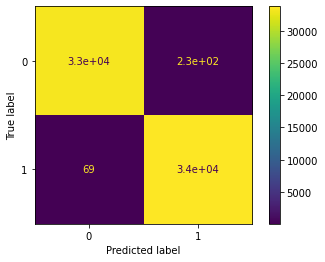

In [ ]:
# Test
plot_confusion_matrix(clf, X_test, y_test)

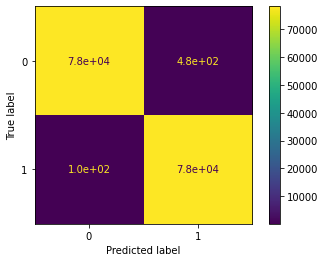

In [ ]:
plot_confusion_matrix(clf, X_train, y_train)

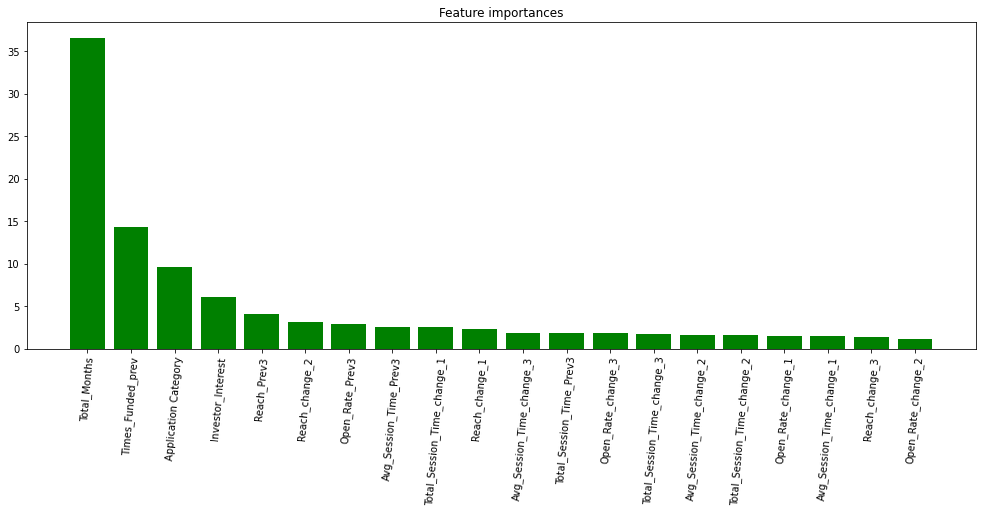

In [ ]:
# Feature Importance
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances.index, feature_importances['importance'],
        color="g",  align="center")
plt.xticks(feature_importances.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

#**MODELS BY SUBSETTING**

In [ ]:
Latest_Final_df[(Latest_Final_df['Times_Funded_prev']==0) & (Latest_Final_df['Funded']==0)]

In [ ]:
never_funded = Latest_Final_df[Latest_Final_df['Times_Funded_prev']==0]

In [ ]:
never_funded.columns

Index(['Application Category', 'funding_ind', 'Avg_Session_Time_Prev3',
       'Open_Rate_Prev3', 'Reach_Prev3', 'Total_Session_Time_Prev3', 'Funded',
       'Avg_Session_Time_change_3', 'Avg_Session_Time_change_2',
       'Avg_Session_Time_change_1', 'Open_Rate_change_3', 'Open_Rate_change_2',
       'Open_Rate_change_1', 'Reach_change_3', 'Reach_change_2',
       'Reach_change_1', 'Total_Session_Time_change_3',
       'Total_Session_Time_change_2', 'Total_Session_Time_change_1',
       'Times_Funded_prev', 'Investor_Interest', 'Total_Months'],
      dtype='object')

In [ ]:
never_funded.drop(['funding_ind', 'Times_Funded_prev'], axis = 1, inplace=True)

In [ ]:
never_funded.head(3)

Application Category  ...  Total_Months
UUID                                                           ...              
0000d19d56df9df1f266fc1fd245a37ff27fb1f3               Social  ...           2.0
0001ef9403a3bb9d7d673d10b5d082a536acaa0a              Medical  ...           3.0
00033006be474a18f422eb285da9b761023b09e1        Entertainment  ...           5.0

[3 rows x 20 columns]

In [ ]:
never_funded['Funded'].value_counts()

0    111852
1       152
Name: Funded, dtype: int64

###**SMOTE**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [ ]:
X = never_funded.drop(['Funded'], axis = 1)
y = never_funded['Funded']

In [ ]:
X.shape, y.shape

((112004, 19), (112004,))

In [ ]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

In [ ]:
X_resampled.shape, y_resampled.shape

((223704, 19), (223704,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((156592, 19), (156592,), (67112, 19), (67112,))

In [ ]:
clf = CatBoostClassifier(iterations=250, learning_rate=0.1) #loss_function='CrossEntropy'

In [ ]:
clf.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test), verbose=2)

0:	learn: 0.6304711	test: 0.6308483	best: 0.6308483 (0)	total: 166ms	remaining: 41.2s
2:	learn: 0.5210675	test: 0.5207203	best: 0.5207203 (2)	total: 469ms	remaining: 38.6s
4:	learn: 0.4430698	test: 0.4426669	best: 0.4426669 (4)	total: 764ms	remaining: 37.4s
6:	learn: 0.3855491	test: 0.3851133	best: 0.3851133 (6)	total: 1.11s	remaining: 38.6s
8:	learn: 0.3516516	test: 0.3510549	best: 0.3510549 (8)	total: 1.43s	remaining: 38.4s
10:	learn: 0.3262579	test: 0.3253822	best: 0.3253822 (10)	total: 1.73s	remaining: 37.6s
12:	learn: 0.2969579	test: 0.2962570	best: 0.2962570 (12)	total: 2.02s	remaining: 36.9s
14:	learn: 0.2814252	test: 0.2807220	best: 0.2807220 (14)	total: 2.33s	remaining: 36.5s
16:	learn: 0.2602303	test: 0.2597233	best: 0.2597233 (16)	total: 2.65s	remaining: 36.3s
18:	learn: 0.2446005	test: 0.2441693	best: 0.2441693 (18)	total: 2.95s	remaining: 35.9s
20:	learn: 0.2319664	test: 0.2315830	best: 0.2315830 (20)	total: 3.29s	remaining: 35.9s
22:	learn: 0.2220181	test: 0.2217077	best:

In [ ]:
X_train_pred_cat = clf.predict(X_train)
X_test_pred_cat = clf.predict(X_test)

In [ ]:
print(classification_report(y_train, X_train_pred_cat))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     78412
           1       0.99      1.00      1.00     78180

    accuracy                           1.00    156592
   macro avg       1.00      1.00      1.00    156592
weighted avg       1.00      1.00      1.00    156592



In [ ]:
print(classification_report(y_test, X_test_pred_cat))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     33440
           1       0.99      1.00      1.00     33672

    accuracy                           1.00     67112
   macro avg       1.00      1.00      1.00     67112
weighted avg       1.00      1.00      1.00     67112



In [ ]:
confusion_matrix(y_train, X_train_pred_cat)

array([[77921,   491],
       [   79, 78101]])

In [ ]:
confusion_matrix(y_test, X_test_pred_cat)

array([[33170,   270],
       [   52, 33620]])

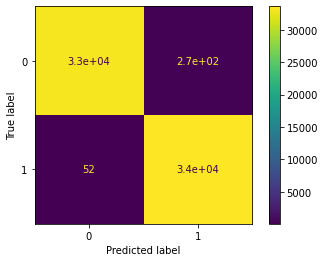

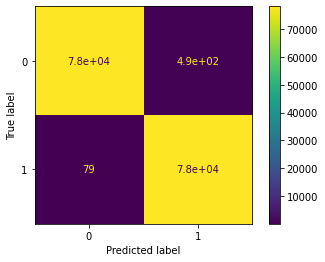

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)
plot_confusion_matrix(clf, X_train, y_train)

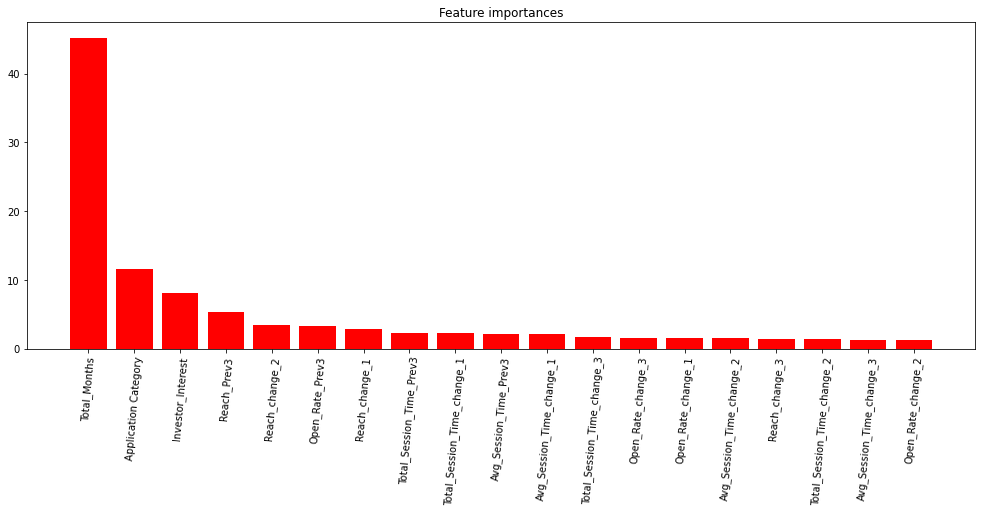

In [ ]:
# Feature Importance
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances.index, feature_importances['importance'],
        color="r",  align="center")
plt.xticks(feature_importances.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

###**FOR FUNDED**

In [ ]:
Funded = Latest_Final_df[Latest_Final_df['Times_Funded_prev']!=0]

In [ ]:
Funded['Funded'].value_counts()

0    358
1     69
Name: Funded, dtype: int64

In [ ]:
# Funded from Original prev DF
Prev_Funded_df = O_data[O_data['funding_ind']==1]

In [ ]:
Funded.reset_index(inplace=True)

In [ ]:
Prev_Funded_df.isna().sum()

UUID                       0
month                      0
Application Category       0
Avg_Session_Time         848
Business Models            0
City                       7
Company Stage              0
Feed Name                  0
Founded Year               0
Latest Funded Date         0
MAU                     2006
Open_Rate                848
Overview                   0
Practice Areas             0
Reach                    744
Region                     0
Total Funding (USD)      159
Total_Session_Time       848
Uninstall_Rate          1507
funding_ind                0
dtype: int64

In [ ]:
year_list = list(set(Prev_Funded_df['month'].value_counts().index.to_list()) - set([20200601, 20200501, 20200401]))

In [ ]:
Prev_Funded_df.set_index('month', inplace=True)

In [ ]:
Prev_Funded_df.shape

(2414, 19)

In [ ]:
Prev_Funded_df= Prev_Funded_df.loc[year_list]

In [ ]:
Prev_Funded_df.shape

(1522, 19)

In [ ]:
Prev_Funded_df.reset_index(inplace=True)

In [ ]:
extra = list(set(Prev_Funded_df['UUID'].value_counts().index.to_list()) - set(Funded['UUID'].value_counts().index.to_list()))

In [ ]:
len(extra)

0

In [ ]:
UUIDS = list(set(Prev_Funded_df['UUID'].value_counts().index.to_list()) - set(extra))

In [ ]:
Prev_Funded_df.set_index('UUID', inplace = True)

In [ ]:
Prev_Funded_df = Prev_Funded_df.loc[UUIDS]

In [ ]:
Prev_Funded_df.reset_index(inplace=True)

In [ ]:
Prev_Funded_df.columns

Index(['UUID', 'Business Models', 'City', 'Company Stage', 'Feed Name',
       'Latest Funded Date', 'Overview', 'Practice Areas'],
      dtype='object')

In [ ]:
a = ['City', 'Company Stage', 'Feed Name', 'Overview', 'Practice Areas', 'Region']

In [ ]:
for i in a:
  print(Prev_Funded_df[i].value_counts())

In [ ]:
Prev_Funded_df.drop(['month', 'Application Category', 'Avg_Session_Time', 'Region'], axis=1, inplace=True)

In [ ]:
Prev_Funded_df.drop(['Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind'], axis=1, inplace=True)

In [ ]:
Prev_Funded_df.shape

(1491, 12)

In [ ]:
Funded.shape

(427, 27)

In [ ]:
temp = Prev_Funded_df.groupby('UUID').mean()

In [ ]:
Funded.head(3)

UUID  ... Total_Months
0  0022cb351d65829b6604dac5347f5a94c9a458b4  ...         21.0
1  002a227d76dec56e6fd80868a72b198d74b27418  ...         21.0
2  00345576a5dd2ecd6241c9cf7219702103fa5c2f  ...          2.0

[3 rows x 23 columns]

In [ ]:
temp.head(2)

Founded Year  ...  Uninstall_Rate
UUID                                                    ...                
0022cb351d65829b6604dac5347f5a94c9a458b4        2016.0  ...        0.130430
002a227d76dec56e6fd80868a72b198d74b27418        2011.0  ...        0.110244

[2 rows x 4 columns]

In [ ]:
Funded = pd.merge(Funded, temp, on='UUID', how='left')

In [ ]:
Prev_Funded_df.drop(['Founded Year', 'MAU', 'Total Funding (USD)', 'Uninstall_Rate'], axis=1, inplace=True)

In [ ]:
Funded.shape

(427, 27)

In [ ]:
Prev_Funded_df.shape

(1491, 8)

In [ ]:
Prev_Funded_df.drop_duplicates(inplace=True)

In [ ]:
Prev_Funded_df.shape

(346, 8)

In [ ]:
Prev_Funded_df.head(2)

UUID  ...                                  Practice Areas
0  8341d6d8c8658e40484ca8996ed63a3c0e1dac1b  ...                                          Retail
2  23ce32d80e6088fc3a4432447b775931cec20d57  ...  Consumer\nRetail\nFinTech\nAccelerator Batches

[2 rows x 8 columns]

In [ ]:
Funded = pd.merge(Funded, Prev_Funded_df, on='UUID', how='left')

In [ ]:
Funded.isna().sum()

UUID                           0
Application Category           0
funding_ind                    0
Avg_Session_Time_Prev3         0
Open_Rate_Prev3                0
Reach_Prev3                    0
Total_Session_Time_Prev3       0
Funded                         0
Avg_Session_Time_change_3      0
Avg_Session_Time_change_2      0
Avg_Session_Time_change_1      0
Open_Rate_change_3             0
Open_Rate_change_2             0
Open_Rate_change_1             0
Reach_change_3                 0
Reach_change_2                 0
Reach_change_1                 0
Total_Session_Time_change_3    0
Total_Session_Time_change_2    0
Total_Session_Time_change_1    0
Times_Funded_prev              0
Investor_Interest              0
Total_Months                   0
MAU                            0
Total Funding (USD)            0
Uninstall_Rate                 0
Business Models                0
City                           0
Company Stage                  0
Feed Name                      0
Latest Fun

In [ ]:
Funded.fillna(method='ffill', limit = 1, inplace = True)

In [ ]:
Funded.fillna(method='backfill', limit = 1, inplace = True)

In [ ]:
Funded.fillna(Funded.mean(), inplace = True)

In [ ]:
Funded.drop('Founded Year', axis=1, inplace=True)

In [ ]:
Funded.drop('Latest Funded Date', axis=1, inplace=True)

In [ ]:
Funded.set_index('UUID', inplace=True)

In [ ]:
Funded.shape

(427, 31)

In [ ]:
new_data_funded = Funded.copy()

In [ ]:
Funded.drop('Business Models', axis=1, inplace=True)

In [ ]:
'Feed Name', 'Overview', 'Practice Areas'

In [ ]:
Funded.drop(['Feed Name', 'Overview', 'Practice Areas'], axis=1, inplace=True)

In [ ]:
'funding_ind'

In [ ]:
Funded.drop(['funding_ind'], axis=1, inplace=True)

In [ ]:
new_data_funded.drop(['funding_ind'], axis=1, inplace=True)

In [ ]:
Funded.drop(['City', 'Company Stage'], axis=1, inplace=True)

###**MODEL**

In [ ]:
X = new_data_funded.drop(['Funded'], axis = 1)
y = new_data_funded['Funded']

In [ ]:
X.shape, y.shape

((427, 29), (427,))

In [ ]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 23, 24, 25, 26, 27, 28], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

In [ ]:
X_resampled.shape, y_resampled.shape

((716, 29), (716,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((501, 29), (501,), (215, 29), (215,))

In [ ]:
clf = CatBoostClassifier(iterations=25, learning_rate=0.1) #loss_function='CrossEntropy'

In [ ]:
cat_features = [0, 23, 24, 25, 26, 27, 28]

In [ ]:
clf.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test), verbose=2)

0:	learn: 0.6005742	test: 0.6011078	best: 0.6011078 (0)	total: 25.5ms	remaining: 611ms
2:	learn: 0.4477298	test: 0.4466831	best: 0.4466831 (2)	total: 49.7ms	remaining: 364ms
4:	learn: 0.3141699	test: 0.3161602	best: 0.3161602 (4)	total: 66.9ms	remaining: 268ms
6:	learn: 0.2430257	test: 0.2312157	best: 0.2312157 (6)	total: 83.7ms	remaining: 215ms
8:	learn: 0.2060308	test: 0.1950163	best: 0.1950163 (8)	total: 101ms	remaining: 179ms
10:	learn: 0.1800604	test: 0.1720808	best: 0.1720808 (10)	total: 118ms	remaining: 150ms
12:	learn: 0.1511162	test: 0.1456430	best: 0.1456430 (12)	total: 135ms	remaining: 124ms
14:	learn: 0.1288382	test: 0.1249197	best: 0.1249197 (14)	total: 151ms	remaining: 101ms
16:	learn: 0.1185634	test: 0.1163942	best: 0.1163942 (16)	total: 168ms	remaining: 79.1ms
18:	learn: 0.1104709	test: 0.1104506	best: 0.1104506 (18)	total: 185ms	remaining: 58.4ms
20:	learn: 0.1017454	test: 0.1073795	best: 0.1073795 (20)	total: 201ms	remaining: 38.3ms
22:	learn: 0.0937652	test: 0.102553

In [ ]:
X_train_pred_cat = clf.predict(X_train)
X_test_pred_cat = clf.predict(X_test)

In [ ]:
print(classification_report(y_train, X_train_pred_cat))
print(classification_report(y_test, X_test_pred_cat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.00      1.00       256

    accuracy                           1.00       501
   macro avg       1.00      1.00      1.00       501
weighted avg       1.00      1.00      1.00       501

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       113
           1       0.96      0.96      0.96       102

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215



In [ ]:
confusion_matrix(y_train, X_train_pred_cat)

array([[244,   1],
       [  0, 256]])

In [ ]:
confusion_matrix(y_test, X_test_pred_cat)

array([[109,   4],
       [  4,  98]])

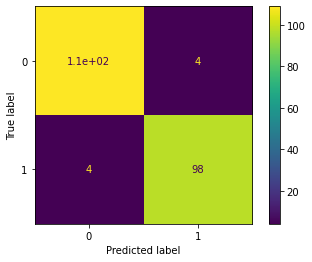

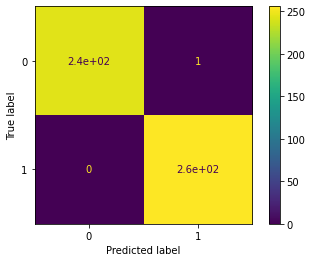

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)
plot_confusion_matrix(clf, X_train, y_train)

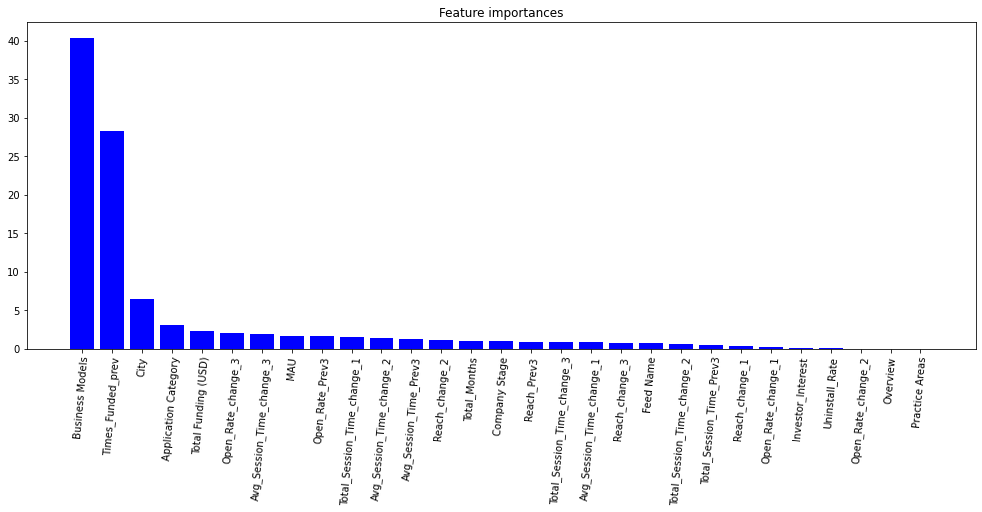

In [ ]:
# Feature Importance
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances.index, feature_importances['importance'],
        color="b",  align="center")
plt.xticks(feature_importances.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

##**EDA**

In [ ]:
temp = Latest_Final_df[Latest_Final_df['Funded']==1]

In [ ]:
temp2 = pd.DataFrame(temp.groupby(['Times_Funded_prev'])['Funded'].count())

In [ ]:
temp2.reset_index(inplace=True)

In [ ]:
temp2['new']=[0,1,1]

In [ ]:
temp2

Times_Funded_prev  Funded  new
0                0.0     152    0
1                1.0      35    1
2                2.0      34    1

In [ ]:
temp3 = temp2.groupby('new')['Funded'].sum()

Text(0.5, 1.0, 'Possiblity to receive Funds')

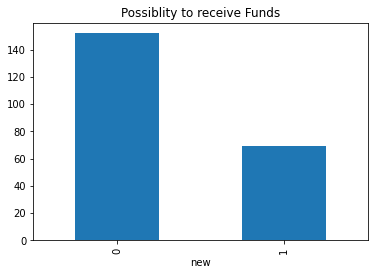

In [ ]:
temp3.plot(kind= 'bar')
plt.title('Possiblity to receive Funds')